In [1]:
## Import Python libraries ## 

import numpy as np
import xsimlab as xs
import matplotlib.pyplot as plt
import xarray as xr


%matplotlib inline
%reload_ext xsimlab.ipython


import fastscape

from orographic_precipitation.fastscape_ext import precip_model
from fastscape.processes import Bedrock

In [2]:
print('xarray-simlab version: ', xs.__version__)
print('fastscape version: ', fastscape.__version__)

xarray-simlab version:  0.5.0
fastscape version:  0.1.0


In [3]:
## Build xarray-simlab model ##
SouthernAndesLEM = precip_model
SouthernAndesLEM = precip_model.drop_processes(['init_topography'])
SouthernAndesLEM = SouthernAndesLEM.update_processes({'bedrock': Bedrock})

SouthernAndesLEM

<xsimlab.Model (17 processes, 26 inputs)>
grid
    shape                  [in] ('shape_yx',) nb. of grid nodes in ...
    length                 [in] ('shape_yx',) total grid length in ...
boundary
    status                 [in] () or ('border',) node status at bo...
fs_context
uplift
    rate                   [in] () or ('y', 'x') uplift rate
tectonics
surf2erode
diffusion
    diffusivity            [in] () or ('y', 'x') diffusivity (trans...
flow
orographic
    lapse_rate             [in] environmental lapse rate
    lapse_rate_m           [in] moist adiabatic lapse rate
    ref_density            [in] reference saturation water vapor de...
    latitude               [in] latitude
    precip_base            [in] () or ('y', 'x') background, non-or...
    rainfall_frequency  [inout] daily rainfall frequency
    wind_speed             [in] wind speed
    wind_dir               [in] wind direction (azimuth)
    conv_time              [in] conversion time
    fall_time              [in

In [4]:
## Build xarray-simlab model ##
SouthernAndesLEM = precip_model
SouthernAndesLEM = precip_model.drop_processes(['init_topography'])
SouthernAndesLEM = SouthernAndesLEM.update_processes({'bedrock': Bedrock})

SouthernAndesLEM

<xsimlab.Model (17 processes, 26 inputs)>
grid
    shape                  [in] ('shape_yx',) nb. of grid nodes in ...
    length                 [in] ('shape_yx',) total grid length in ...
boundary
    status                 [in] () or ('border',) node status at bo...
fs_context
uplift
    rate                   [in] () or ('y', 'x') uplift rate
tectonics
surf2erode
diffusion
    diffusivity            [in] () or ('y', 'x') diffusivity (trans...
flow
orographic
    lapse_rate             [in] environmental lapse rate
    lapse_rate_m           [in] moist adiabatic lapse rate
    ref_density            [in] reference saturation water vapor de...
    latitude               [in] latitude
    precip_base            [in] () or ('y', 'x') background, non-or...
    rainfall_frequency  [inout] daily rainfall frequency
    wind_speed             [in] wind speed
    wind_dir               [in] wind direction (azimuth)
    conv_time              [in] conversion time
    fall_time              [in

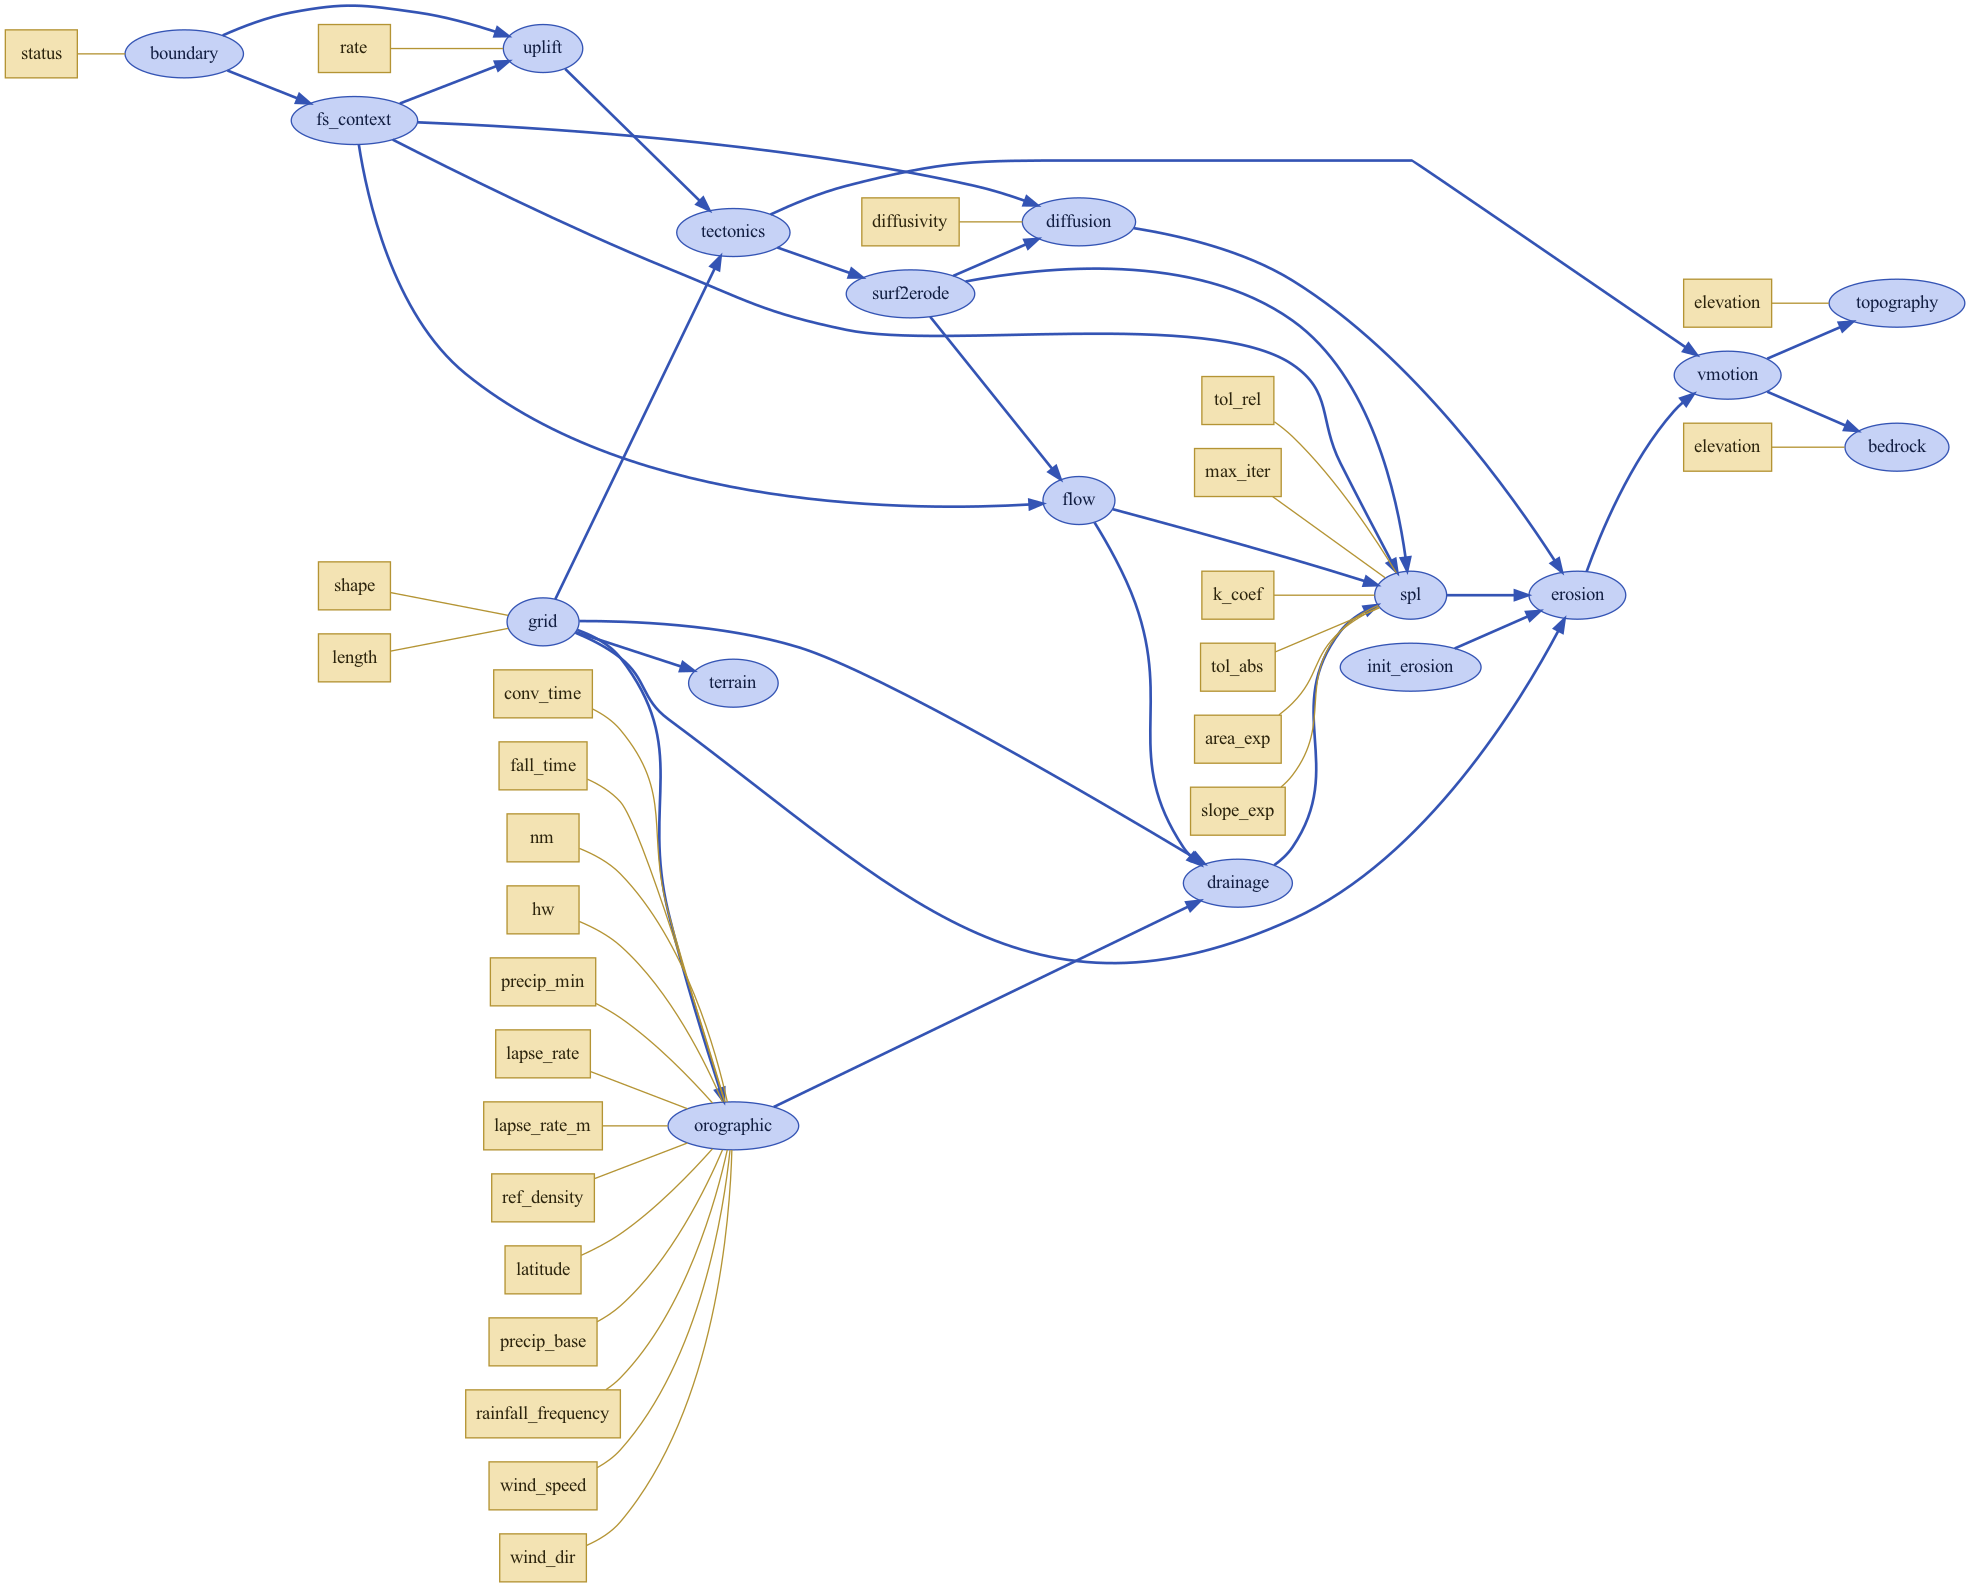

In [5]:
## Visualise xarray-simlab ##
SouthernAndesLEM.visualize(show_inputs='True')

In [6]:
## Model dimensions/grid dimensions ##
nx = 100
ny = 100
nn = nx * ny

xl = 100.e3
yl = 100.e3

BoundaryCondition = ['looped', 'looped', 'fixed_value', 'fixed_value']

## Model time and time stepping ##
EndTime_1 = 5e6
EndTime_2 = 5e6
EndTime_3 = 8e6
TimeSteps_1 = 10001
TimeSteps_2 = 10001
TimeSteps_3 = 16001

# EndTime = 1e6
# TimeSteps = 1001
ModelTime_1 = np.linspace(0., EndTime_1, TimeSteps_1)
ModelTime_2 = np.linspace(0., EndTime_2, TimeSteps_2)
ModelTime_3 = np.linspace(0., EndTime_3, TimeSteps_3)

PlotStep = 100

## Tectonics ##
k_coef= 2.5e-5
area_exp = 0.4
slope_exp = 1.0
diffusion_diffusivity = 0.


## Orographic ##
lapse_rate = -5.4 #mean lapse rate of area not too far away 
lapse_rate_m = -6.5 #left default
ref_density = 7.4e-3  #left default
rainfall_frequency = 5 #could not calculate at high enough resolution
latitude = 46  #latitude around the area north in the Patagonian Andes
precip_base =  1e-4 #not sure if I should change this or not
wind_speed = 10 #base to start with 
wind_dir = 270  # estimated direction given weather info 
precip_min = 0.1 #chatgpt value so could be wrong
conv_time = 2000 #2000 thesis value
fall_time = 2000 #2000 thesis value
nm = 0.003  #0.03 #thesis value
hw = 5000  #


## Initial topography ##
WhiteNoiseLevel = 50 # in [m], amplitude of noise

## Seed for Reproducibility ##
RandomSeed = 1410

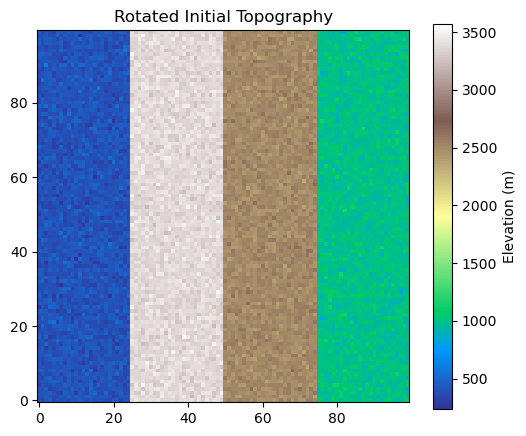

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid size
nx, ny = 100, 100  # Example values; adjust as needed
nn = nx * ny  # Total number of nodes

# Initialize an array to store elevations
InitialTopography = np.zeros(nn)

# Assign elevations based on node indices (using slicing and grid structure)
InitialTopography[:int(0.25 * nn)] = 400    # First 25% of nodes
InitialTopography[int(0.25 * nn):int(0.5 * nn)] = 3375  # Next 25% of nodes
InitialTopography[int(0.5 * nn):int(0.75 * nn)] = 2500  # Next 25% of nodes
InitialTopography[int(0.75 * nn):] = 1000  # Last 25% of nodes

# Adding random noise to the elevations
np.random.seed(42)  # For reproducibility
WhiteNoiseLevel = 50  # Standard deviation of noise
Noise = np.random.normal(0, WhiteNoiseLevel, nn)
InitialTopography += Noise  # Add noise to the elevations

# Reshape the 1D array to 2D with shape (ny, nx)
InitialTopography_2D = InitialTopography.reshape((ny, nx))

# Define first stage uplift rates for each region
UpliftRates = np.zeros(nn)  # Initialize uplift rates array

# Assign uplift rates to regions (using slicing or fractions of the total nodes)
UpliftRates[:int(0.25 * nn)] = 0.01    # First 25% of nodes
UpliftRates[int(0.25 * nn):int(0.5 * nn)] = 0.041  # Next 25% of nodes
UpliftRates[int(0.5 * nn):int(0.75 * nn)] = 0.035  # Next 25% of nodes
UpliftRates[int(0.75 * nn):] = 0.02  # Last 25% of nodes

# Adding random noise to the uplift rates for realism (optional)
np.random.seed(42)  # For reproducibility
UpliftNoise = np.random.normal(0, 0.005, nn)  # Small noise in uplift rates
UpliftRates += UpliftNoise  # Add noise to the uplift rates

# Reshape the 1D array to 2D with shape (ny, nx)
UpliftRates_2D = UpliftRates.reshape((ny, nx))

# Rotate both topography and uplift rates 90 degrees clockwise
RotatedTopography_2D = np.rot90(InitialTopography_2D, k=1)
RotatedUpliftRates_2D = np.rot90(UpliftRates_2D, k=1)

# Plot the rotated topography
plt.figure(figsize=(6, 5))
plt.imshow(RotatedTopography_2D, cmap='terrain', origin='lower')
plt.colorbar(label='Elevation (m)')
plt.title('Rotated Initial Topography')
plt.show()


In [8]:
import os
import numpy as np
import xsimlab as xs

# Directory to save Zarr files
output_dir = "simulation_outputs"
os.makedirs(output_dir, exist_ok=True)

# Define wind direction values to test (in degrees, e.g., 270 to 350)
wind_dir_values = np.linspace(270, 350, 10)  # Example range from 270° to 350°

# Time steps to visualize
time_indices = [0, 1, 10, 100, 1000, 10000]
mean_elevations = []

# Loop through wind direction values and run simulations
for wind_dir in wind_dir_values:
    print(f"Running simulation for wind_dir = {wind_dir}")
    
    # Set up the model with the current wind direction
    in_ds_wind = xs.create_setup(
        model=SouthernAndesLEM,
        clocks={
            'time': ModelTime_1,
            'output': ModelTime_1[::PlotStep]
        },
        master_clock='time',
        input_vars={
            'grid': {'shape': [nx, ny], 'length': [xl, yl]},
            'boundary': {'status': BoundaryCondition},
            'topography': {'elevation': RotatedTopography_2D},
            'bedrock': {'elevation': RotatedTopography_2D},
            'uplift': {'rate': RotatedUpliftRates_2D},
            'spl': {'k_coef': k_coef, 'area_exp': area_exp, 'slope_exp': slope_exp},
            'diffusion': {'diffusivity': diffusion_diffusivity},
            'orographic': {
                'lapse_rate': lapse_rate,
                'lapse_rate_m': lapse_rate_m,
                'ref_density': ref_density,
                'rainfall_frequency': rainfall_frequency,  # Keep rainfall frequency constant
                'latitude': latitude,
                'precip_base': precip_base,
                'wind_speed': wind_speed,
                'wind_dir': wind_dir,  # Change wind direction
                'precip_min': precip_min,
                'conv_time': conv_time,
                'fall_time': fall_time,
                'nm': nm,
                'hw': hw,
            },
        },
        output_vars={'topography__elevation': 'time', 'orographic__precip_rate': 'time'}
    )

    # Run the simulation
    with xs.monitoring.ProgressBar():
        out_ds_wind = in_ds_wind.xsimlab.run(model=SouthernAndesLEM)
    
    # Store simulation results in Zarr format
    zarr_filename = os.path.join(output_dir, f"simulation_wind_dir_{wind_dir:.0f}.zarr")
    out_ds_wind.to_zarr(zarr_filename, mode='w')
    print(f"Saved results for wind_dir = {wind_dir} to {zarr_filename}")


Running simulation for wind_dir = 270.0


             0% | initialize 

Saved results for wind_dir = 270.0 to simulation_outputs/simulation_wind_dir_270.zarr
Running simulation for wind_dir = 278.8888888888889


             0% | initialize 

Saved results for wind_dir = 278.8888888888889 to simulation_outputs/simulation_wind_dir_279.zarr
Running simulation for wind_dir = 287.77777777777777


             0% | initialize 

Saved results for wind_dir = 287.77777777777777 to simulation_outputs/simulation_wind_dir_288.zarr
Running simulation for wind_dir = 296.6666666666667


             0% | initialize 

Saved results for wind_dir = 296.6666666666667 to simulation_outputs/simulation_wind_dir_297.zarr
Running simulation for wind_dir = 305.55555555555554


             0% | initialize 

Saved results for wind_dir = 305.55555555555554 to simulation_outputs/simulation_wind_dir_306.zarr
Running simulation for wind_dir = 314.44444444444446


             0% | initialize 

Saved results for wind_dir = 314.44444444444446 to simulation_outputs/simulation_wind_dir_314.zarr
Running simulation for wind_dir = 323.3333333333333


             0% | initialize 

Saved results for wind_dir = 323.3333333333333 to simulation_outputs/simulation_wind_dir_323.zarr
Running simulation for wind_dir = 332.22222222222223


             0% | initialize 

Saved results for wind_dir = 332.22222222222223 to simulation_outputs/simulation_wind_dir_332.zarr
Running simulation for wind_dir = 341.1111111111111


             0% | initialize 

Saved results for wind_dir = 341.1111111111111 to simulation_outputs/simulation_wind_dir_341.zarr
Running simulation for wind_dir = 350.0


             0% | initialize 

Saved results for wind_dir = 350.0 to simulation_outputs/simulation_wind_dir_350.zarr


Available wind direction values in dataset: [270. 279. 288. 297. 306. 314. 323. 332. 341. 350.]


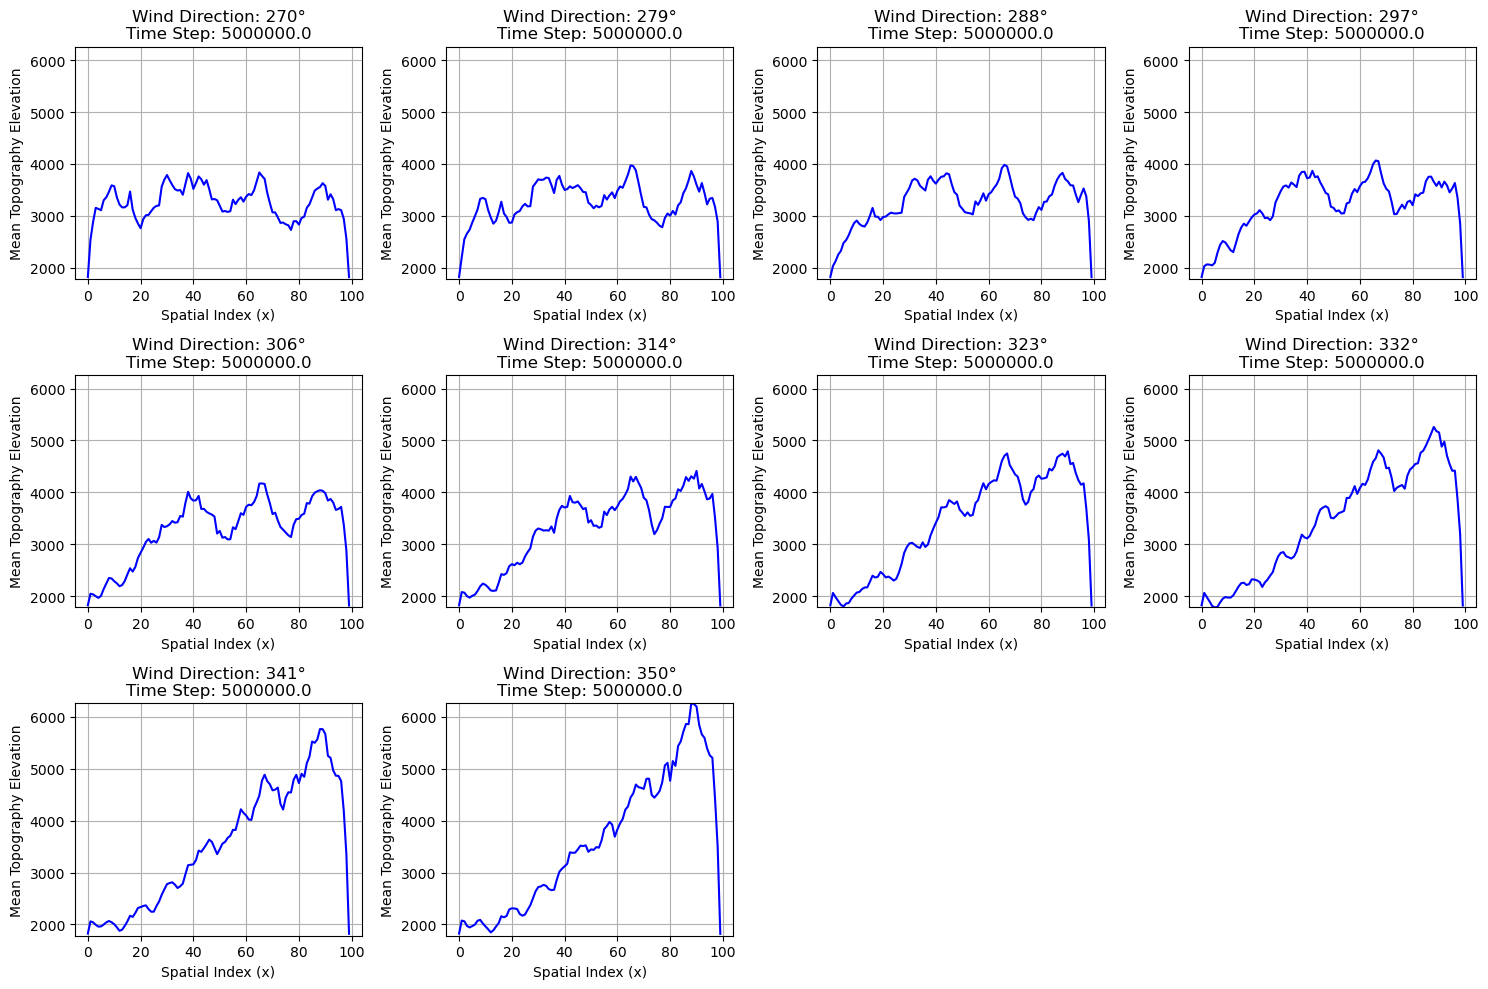

In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Directory containing Zarr files
output_dir = "simulation_outputs"

# List all Zarr files and sort by wind direction values
zarr_files = [f for f in os.listdir(output_dir) if f.startswith("simulation_wind_dir_") and f.endswith(".zarr")]
zarr_files.sort(key=lambda f: float(f.split("_")[-1][:-5]))  # Extract and sort wind direction values

# Define the wind direction values to plot
desired_wind_dirs = np.linspace(270, 350, 10)  # Adjust range based on actual values

# Load datasets and attach wind direction as a coordinate
datasets = []
wind_dirs = []

for zarr_file in zarr_files:
    wind_dir = float(zarr_file.split("_")[-1][:-5])  # Extract wind direction from filename
    ds = xr.open_zarr(os.path.join(output_dir, zarr_file), chunks={})
    
    # Add wind direction as a coordinate
    ds = ds.assign_coords(wind_dir=wind_dir)
    
    datasets.append(ds)
    wind_dirs.append(wind_dir)

# Concatenate datasets along the new wind direction dimension
combined_ds = xr.concat(datasets, dim="wind_dir")

# Ensure wind_dir is a dimension and coordinate
combined_ds = combined_ds.sortby("wind_dir")

# Print available values for debugging
print("Available wind direction values in dataset:", combined_ds.wind_dir.values)

# Fix: Use nearest selection for valid wind direction values
valid_wind_dirs = []
for wd in desired_wind_dirs:
    try:
        elevation_data = combined_ds.topography__elevation.isel(time=-1).sel(wind_dir=wd, method="nearest").mean(dim='x')
        valid_wind_dirs.append(wd)
    except KeyError:
        print(f"Skipping {wd}: No matching data found.")

# Adjust number of rows and columns based on valid wind direction values
n_valid = len(valid_wind_dirs)
ncols = 4  # Define number of columns
nrows = (n_valid // ncols) + (1 if n_valid % ncols != 0 else 0)  # Calculate rows needed

# Create subplots dynamically based on valid wind direction values
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axes = axes.flatten()

# Initialize variables to track global min and max for consistent y-axis scaling
global_min_elevation = np.inf
global_max_elevation = -np.inf

# First, loop to find the global min and max of the mean topography elevations
for wd in valid_wind_dirs:
    elevation_data = combined_ds.topography__elevation.isel(time=-1).sel(wind_dir=wd, method="nearest").mean(dim='x')
    global_min_elevation = min(global_min_elevation, elevation_data.min())
    global_max_elevation = max(global_max_elevation, elevation_data.max())

# Plot only for valid wind direction values
for idx, wd in enumerate(valid_wind_dirs):
    ax = axes[idx]
    time_step = str(combined_ds.time[-1].values)  # Extract the last time step value
    title = f"Wind Direction: {wd:.0f}°\nTime Step: {time_step}"
    
    # Get the mean elevation for this wind direction at the last time step
    elevation_data = combined_ds.topography__elevation.isel(time=-1).sel(wind_dir=wd, method="nearest").mean(dim='x')
    
    # Plot the elevation data as a line plot
    ax.plot(elevation_data, label='Mean Topography Elevation', color='blue')
    
    ax.set_title(title)
    ax.set_ylabel("Mean Topography Elevation")
    ax.set_xlabel("Spatial Index (x)")
    ax.set_ylim(global_min_elevation, global_max_elevation)
    ax.grid(True)

# Hide unused axes
for ax in axes[len(valid_wind_dirs):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

# Close all datasets
for ds in datasets:
    ds.close()


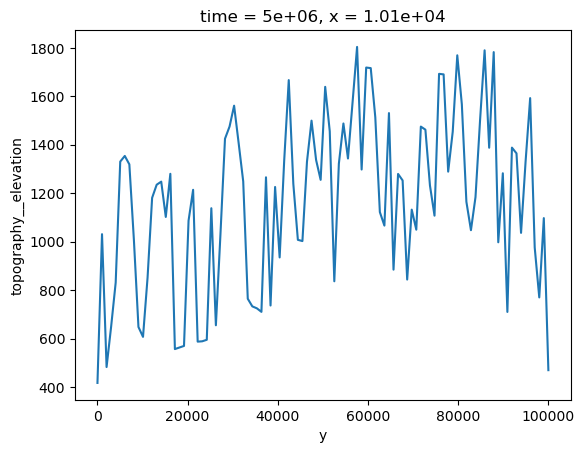

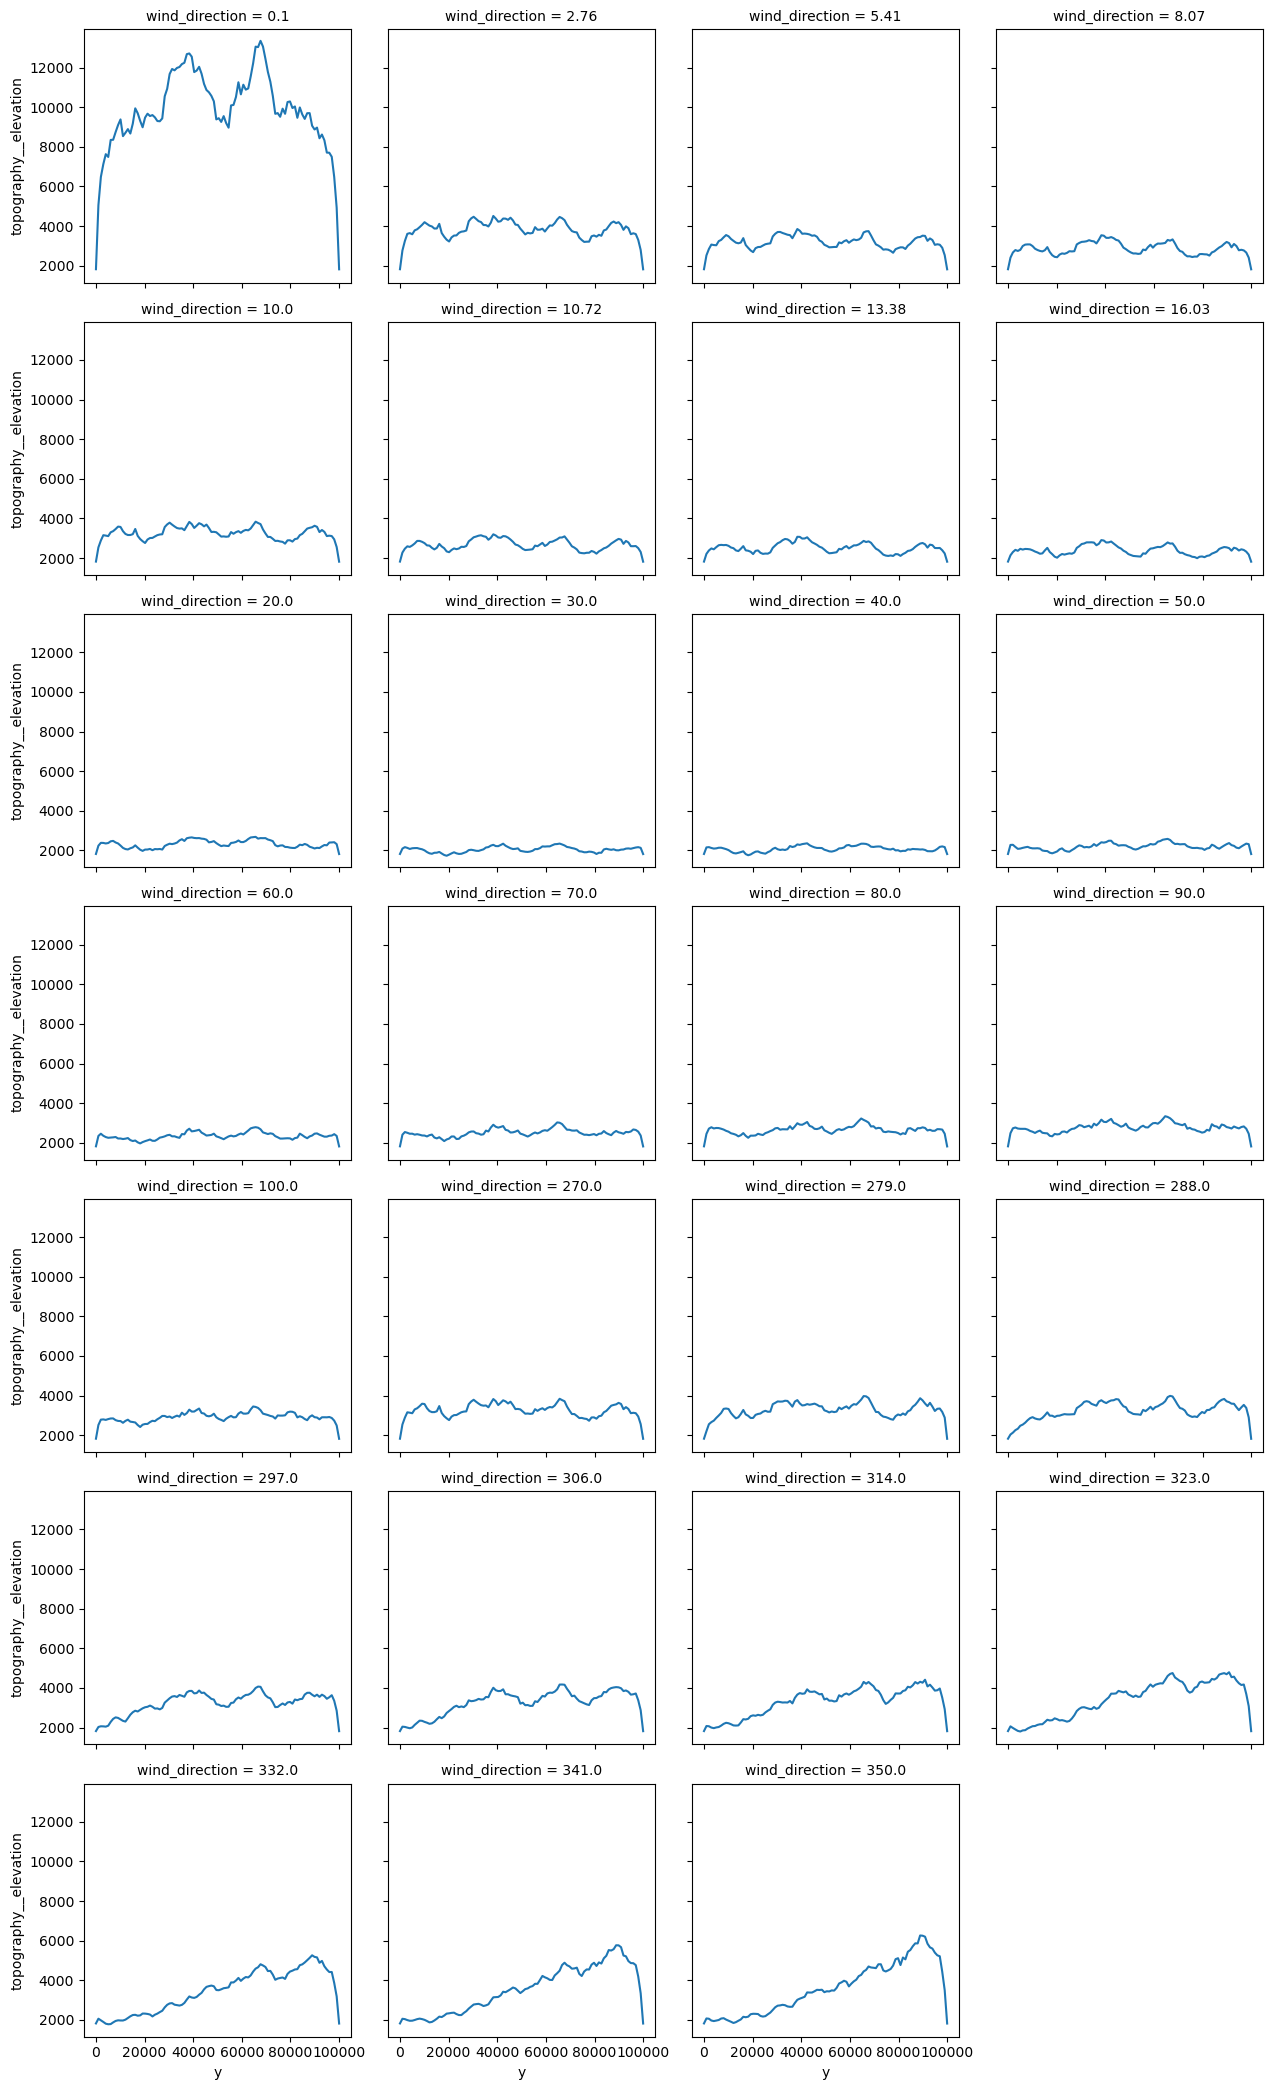

In [9]:
import os
import numpy as np
import xarray as xr
import hvplot.xarray  # For interactive plotting
import matplotlib.pyplot as plt
import dask

# Directory containing Zarr files
output_dir = "simulation_outputs"

# List all Zarr files and sort by wind direction
zarr_files = [f for f in os.listdir(output_dir) if f.endswith(".zarr")]
zarr_files.sort(key=lambda f: float(f.split("_")[-1][:-5]))

# Load datasets and attach wind_direction as a coordinate
datasets = []
wind_directions = []
for zarr_file in zarr_files:
    wind_direction = float(zarr_file.split("_")[-1][:-5])  # Extract wind direction from filename
    ds = xr.open_zarr(os.path.join(output_dir, zarr_file), chunks={})
    
    # Add wind_direction as a coordinate
    ds = ds.assign_coords(wind_direction=wind_direction)
    
    datasets.append(ds)
    wind_directions.append(wind_direction)

# Concatenate datasets along the new wind_direction dimension
combined_ds = xr.concat(datasets, dim="wind_direction")

# Ensure wind_direction is a dimension and coordinate
combined_ds = combined_ds.sortby("wind_direction")

# Interactive elevation map
elevation_plot = combined_ds.topography__elevation.hvplot.image(
    x='x', y='y', cmap='viridis', groupby=['time', 'wind_direction']
)
elevation_plot

# Compute and plot mean elevation over wind direction
avg_elevation = combined_ds.topography__elevation.mean(dim='wind_direction')

# Fix: Use method="nearest" to avoid KeyError
avg_elevation.isel(time=-1).sel(x=10000, method="nearest").plot()

# Plot mean elevation at the last time step across different wind directions
(combined_ds
 .topography__elevation.isel(time=-1)  # Select last time step
 .mean(dim='x')  # Average over 'x' axis
 .plot(col='wind_direction', col_wrap=4)  # Plot for each wind direction
)

# Ensure the plots are displayed
plt.show()

# Close all datasets
for ds in datasets:
    ds.close()


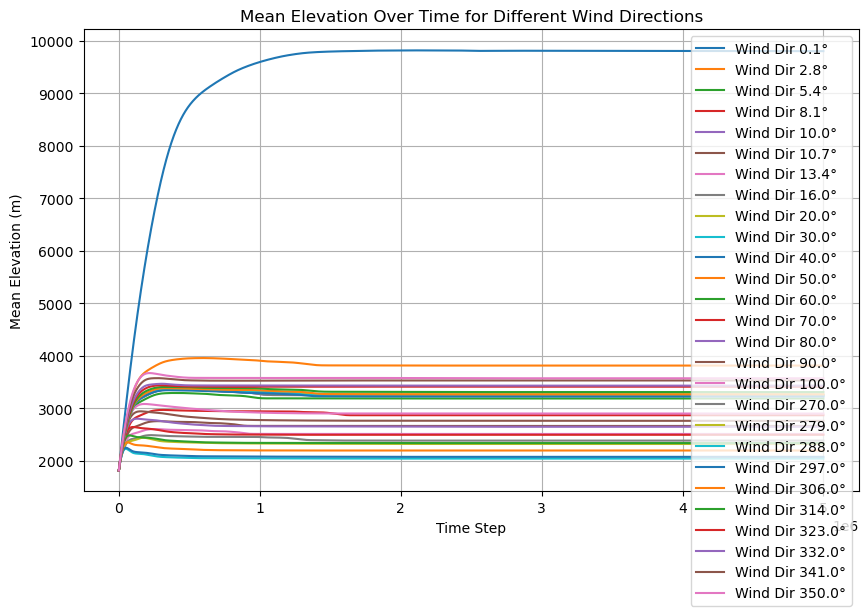

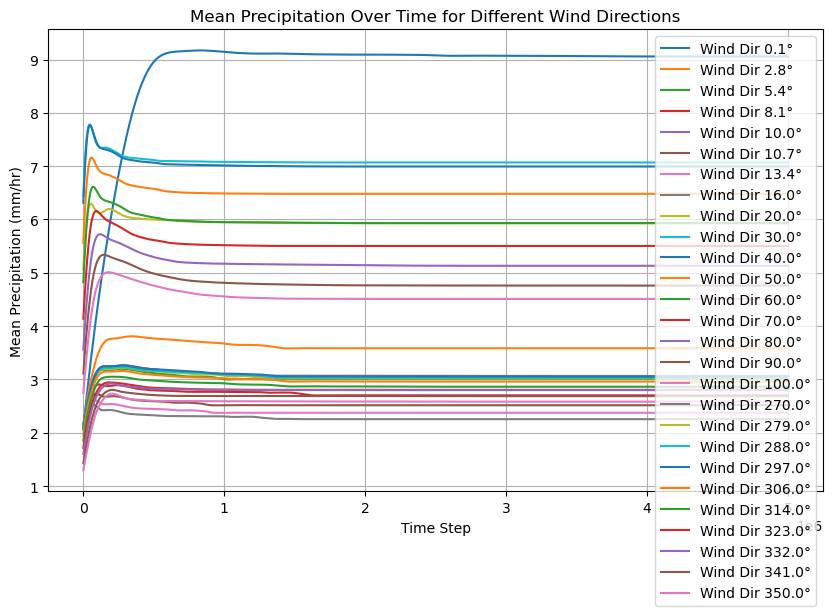

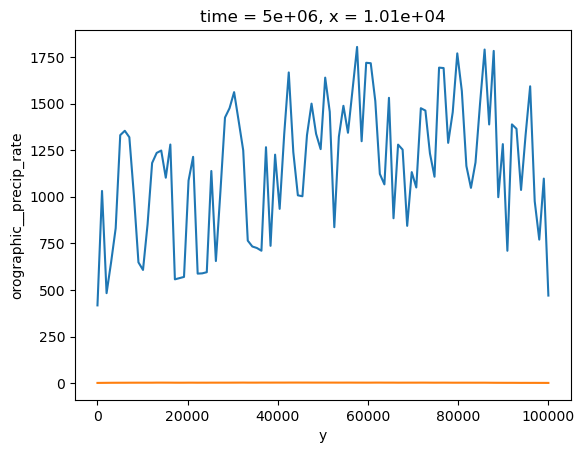

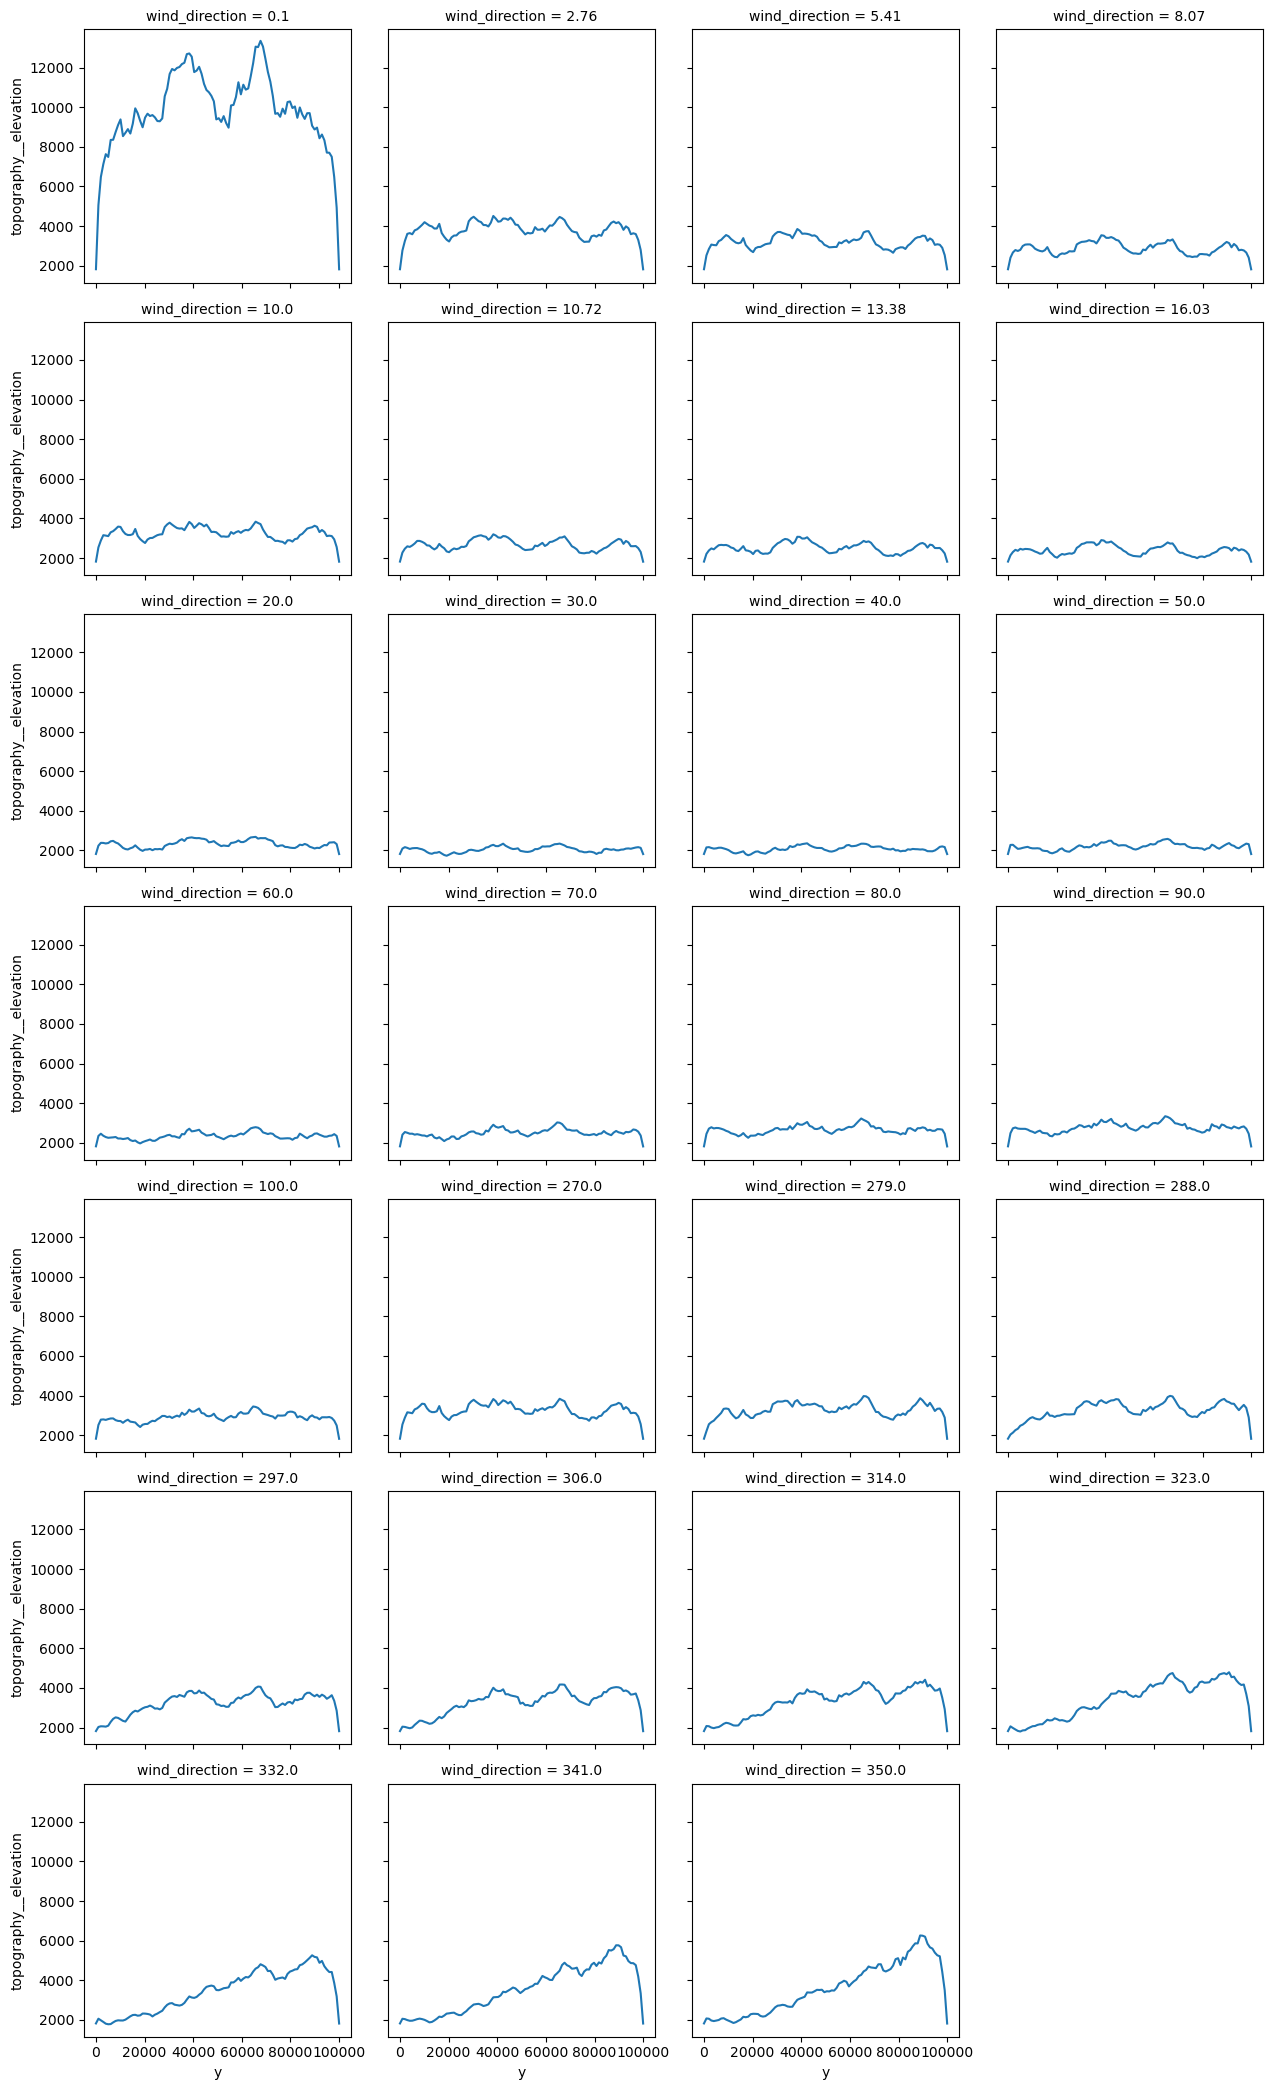

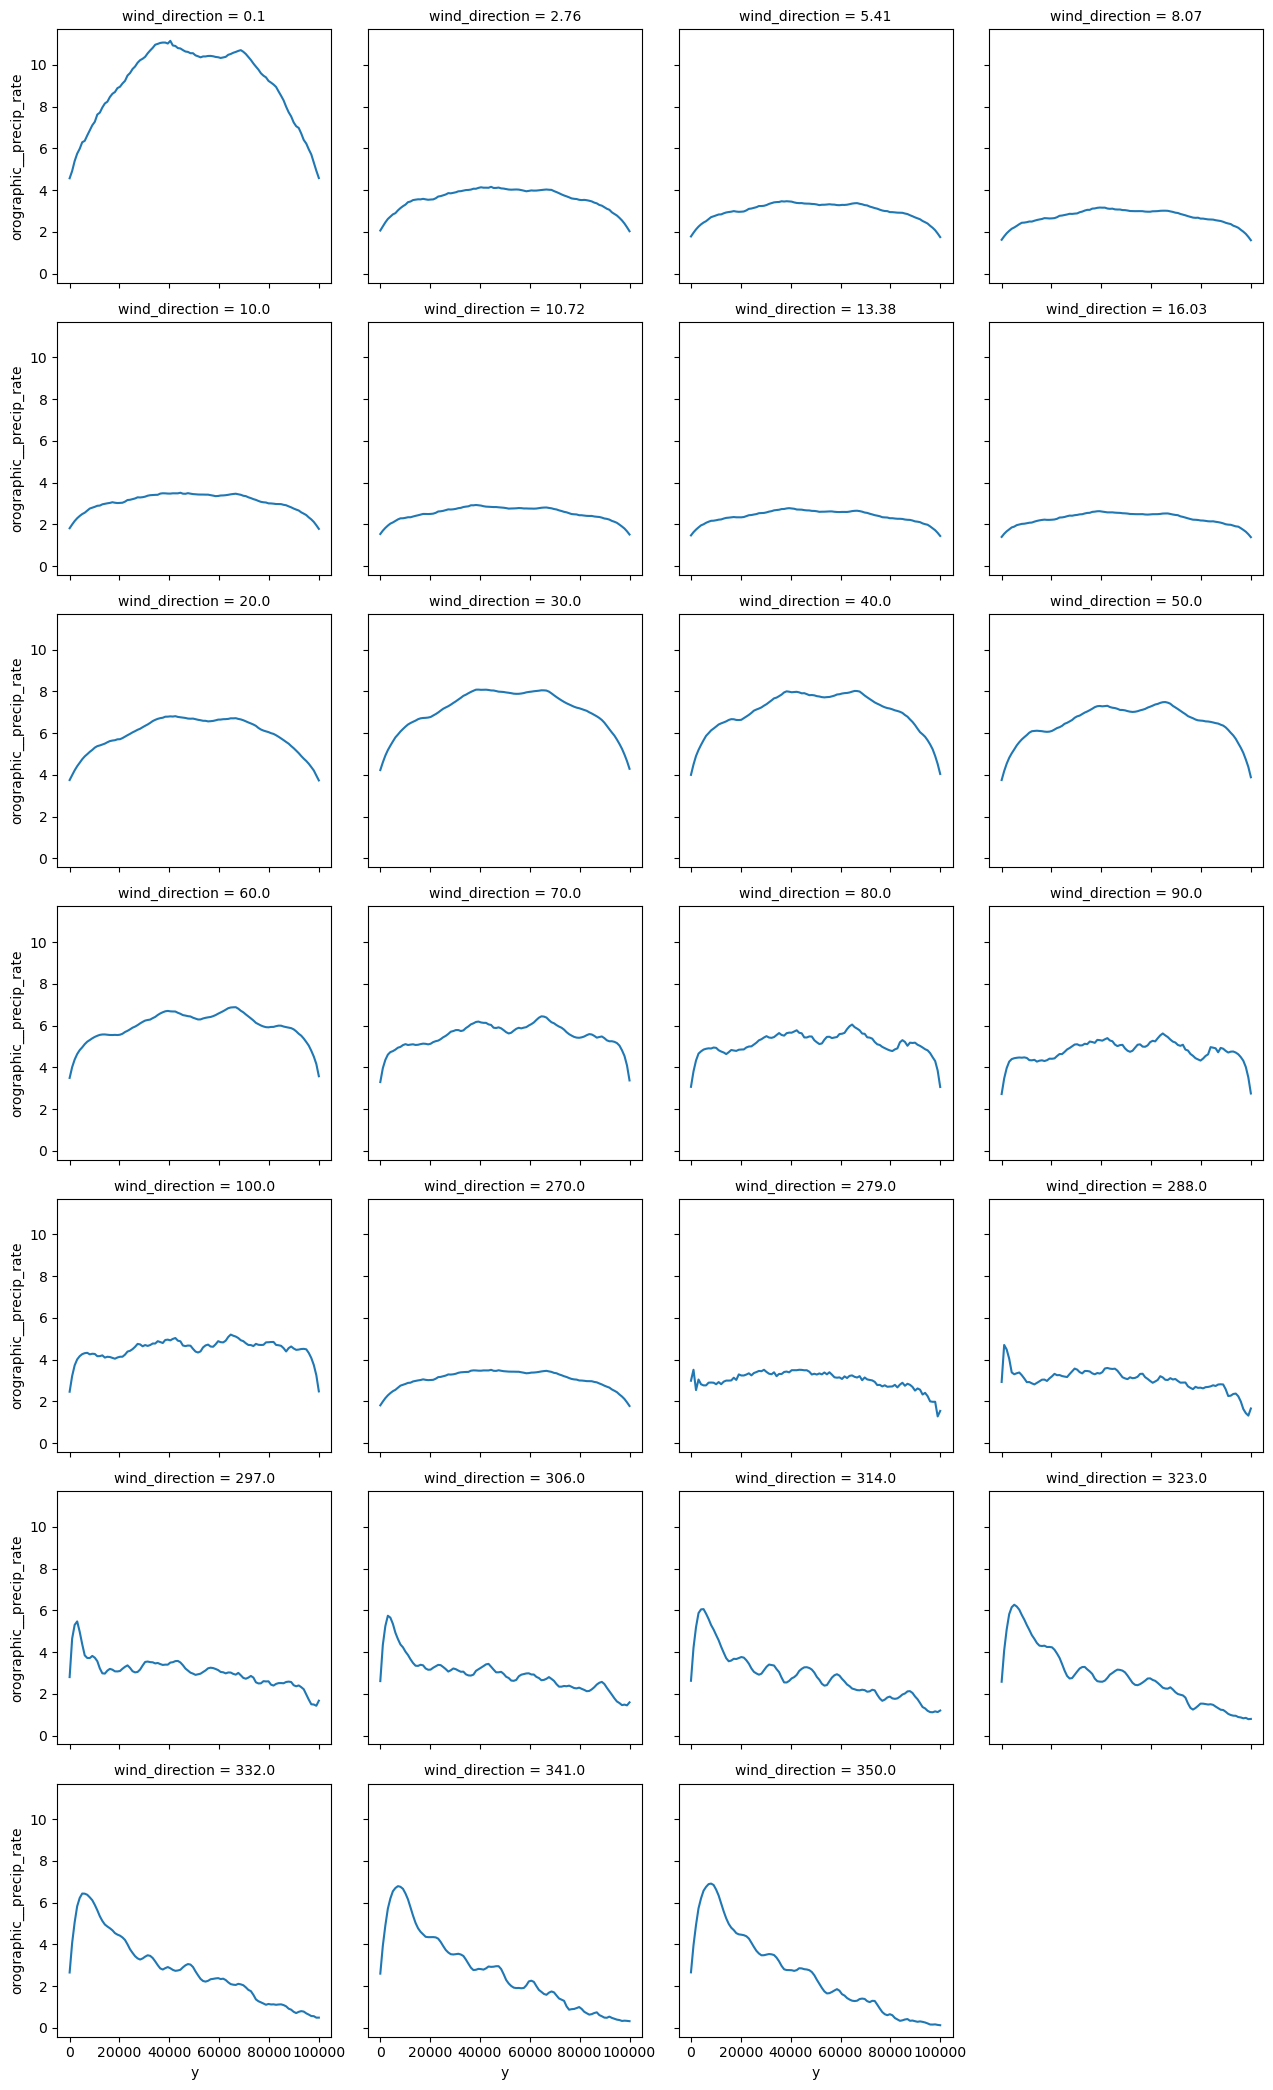

In [12]:
import os
import numpy as np
import xarray as xr
import hvplot.xarray  # For interactive plotting
import matplotlib.pyplot as plt
import dask

# Directory containing Zarr files
output_dir = "simulation_outputs"

# List all Zarr files and sort by wind direction
zarr_files = [f for f in os.listdir(output_dir) if f.endswith(".zarr")]
zarr_files.sort(key=lambda f: float(f.split("_")[-1][:-5]))

# Load datasets and attach wind_direction as a coordinate
datasets = []
wind_directions = []
for zarr_file in zarr_files:
    wind_direction = float(zarr_file.split("_")[-1][:-5])  # Extract wind direction from filename
    ds = xr.open_zarr(os.path.join(output_dir, zarr_file), chunks={})
    
    # Add wind_direction as a coordinate
    ds = ds.assign_coords(wind_direction=wind_direction)
    
    datasets.append(ds)
    wind_directions.append(wind_direction)

# Concatenate datasets along the new wind_direction dimension
combined_ds = xr.concat(datasets, dim="wind_direction")

# Ensure wind_direction is a dimension and coordinate
combined_ds = combined_ds.sortby("wind_direction")

### 📌 Plot 1: Mean Elevation Over Time for Different Wind Directions
plt.figure(figsize=(10, 6))
for ds, wind_direction in zip(datasets, wind_directions):
    mean_elevation = ds["topography__elevation"].mean(dim=("x", "y"))
    plt.plot(ds["time"], mean_elevation, label=f"Wind Dir {wind_direction:.1f}°")

plt.xlabel("Time Step")
plt.ylabel("Mean Elevation (m)")
plt.title("Mean Elevation Over Time for Different Wind Directions")
plt.legend()
plt.grid()
plt.show()

### 📌 Plot 2: Mean Precipitation Over Time for Different Wind Directions
plt.figure(figsize=(10, 6))
for ds, wind_direction in zip(datasets, wind_directions):
    mean_precip = ds["orographic__precip_rate"].mean(dim=("x", "y"))
    plt.plot(ds["time"], mean_precip, label=f"Wind Dir {wind_direction:.1f}°")

plt.xlabel("Time Step")
plt.ylabel("Mean Precipitation (mm/hr)")
plt.title("Mean Precipitation Over Time for Different Wind Directions")
plt.legend()
plt.grid()
plt.show()

# Compute and plot mean elevation over wind direction
avg_elevation = combined_ds.topography__elevation.mean(dim='wind_direction')

# Fix: Use method="nearest" to avoid KeyError
avg_elevation.isel(time=-1).sel(x=10000, method="nearest").plot()

# Compute and plot mean precipitation over wind direction
avg_precip = combined_ds.orographic__precip_rate.mean(dim='wind_direction')

# Fix: Use method="nearest" to avoid KeyError
avg_precip.isel(time=-1).sel(x=10000, method="nearest").plot()

### 📌 Plot 3: Mean Elevation Across Wind Directions at Final Time Step
(combined_ds
 .topography__elevation.isel(time=-1)  # Select last time step
 .mean(dim='x')  # Average over 'x' axis
 .plot(col='wind_direction', col_wrap=4)  # Plot for each wind direction
)

### 📌 Plot 4: Mean Precipitation Across Wind Directions at Final Time Step
(combined_ds
 .orographic__precip_rate.isel(time=-1)  # Select last time step
 .mean(dim='x')  # Average over 'x' axis
 .plot(col='wind_direction', col_wrap=4)  # Plot for each wind direction
)

### 📌 Plot 5: Elevation Map at Final Time Step for Each Wind Direction
hvplot_layout = combined_ds.topography__elevation.isel(time=-1).hvplot.image(
    x='x', y='y', cmap='viridis', groupby='wind_direction', height=400, width=600
)
hvplot_layout

# Ensure the plots are displayed
plt.show()

# Close all datasets
for ds in datasets:
    ds.close()


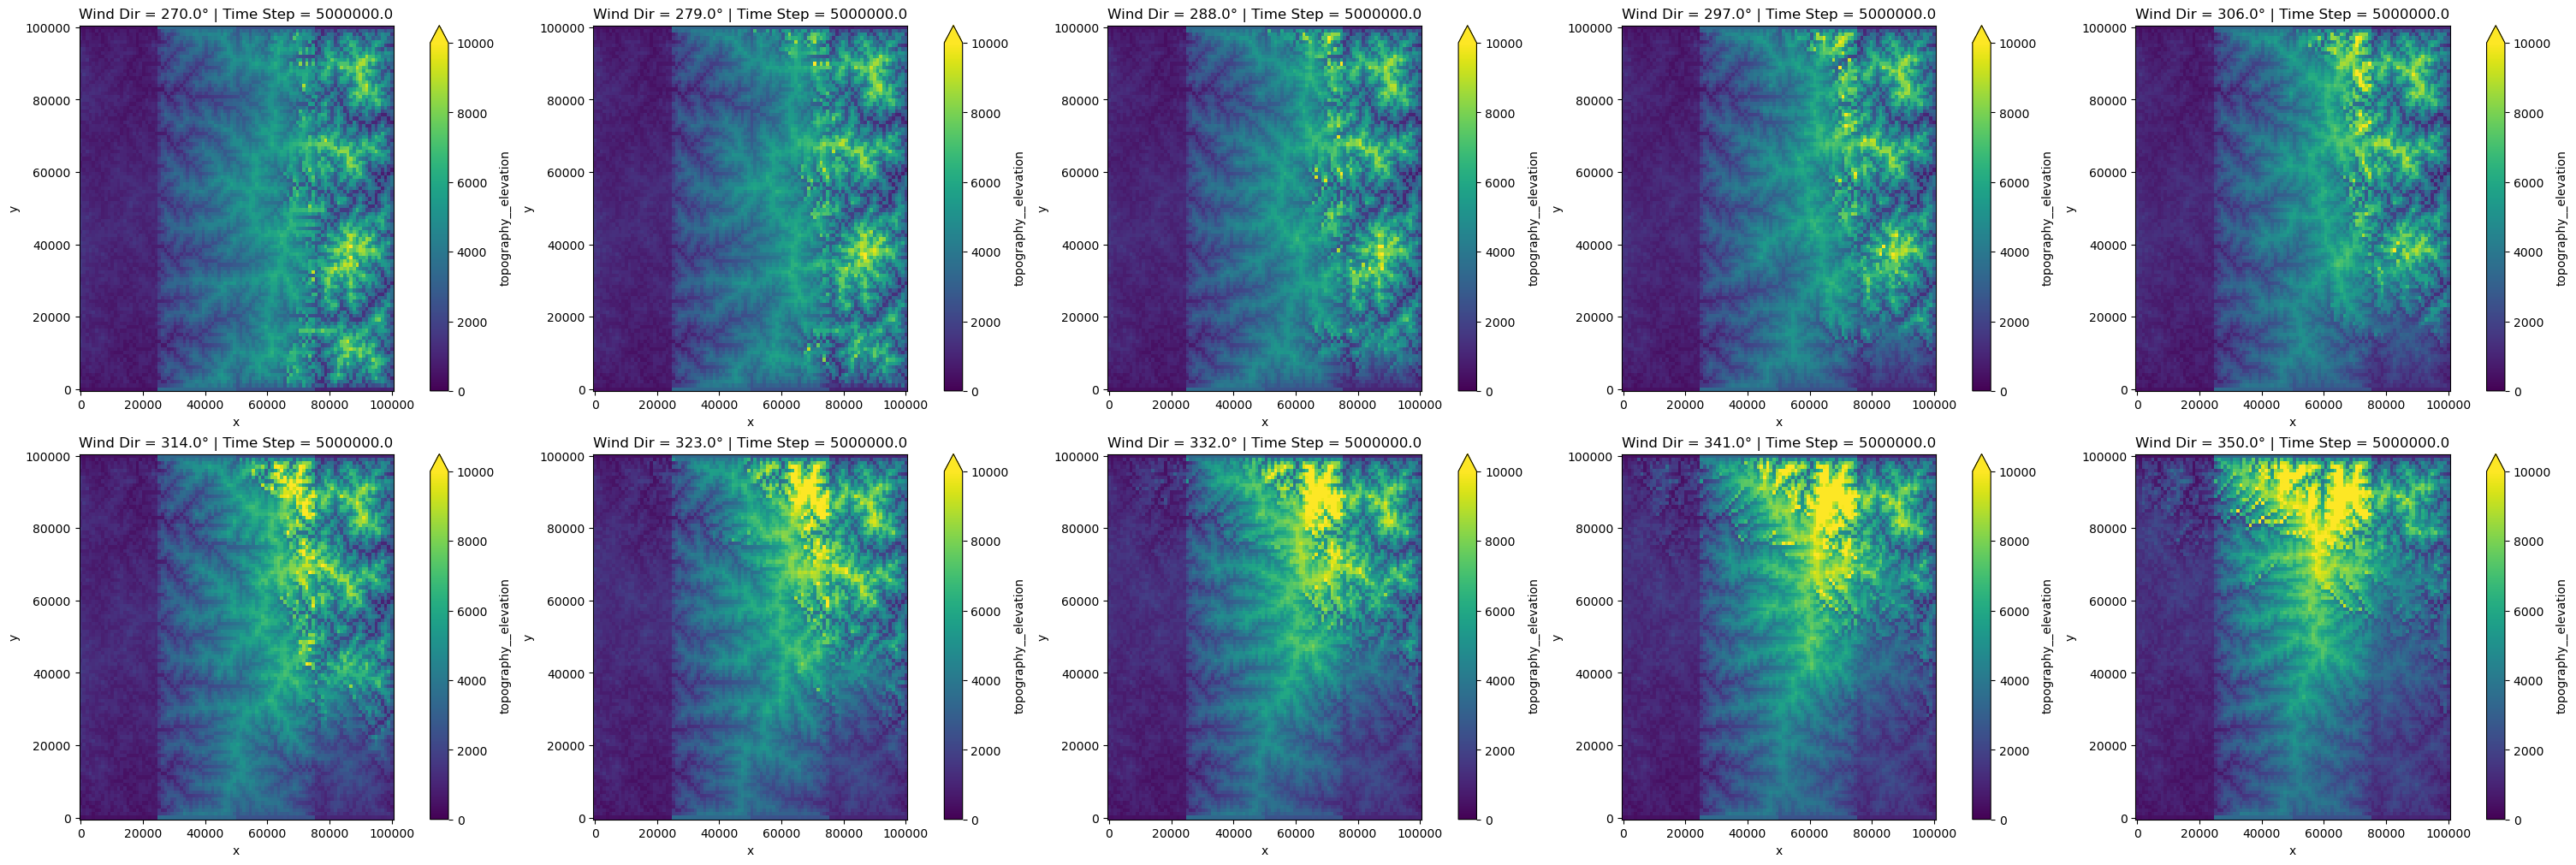

In [18]:
import os
import numpy as np
import xarray as xr
import hvplot.xarray  # For interactive plotting
import matplotlib.pyplot as plt
import dask

# Directory containing Zarr files
output_dir = "simulation_outputs"

# List all Zarr files and sort by wind direction
zarr_files = [f for f in os.listdir(output_dir) if f.endswith(".zarr")]
zarr_files.sort(key=lambda f: float(f.split("_")[-1][:-5]))

# Load datasets and attach wind_direction as a coordinate
datasets = []
wind_directions = []
time_steps = []
for zarr_file in zarr_files:
    wind_direction = float(zarr_file.split("_")[-1][:-5])  # Extract wind direction from filename
    if 270 <= wind_direction <= 350:  # Filter wind directions between 270 and 350
        ds = xr.open_zarr(os.path.join(output_dir, zarr_file), chunks={})
        
        # Add wind_direction as a coordinate
        ds = ds.assign_coords(wind_direction=wind_direction)
        
        datasets.append(ds)
        wind_directions.append(wind_direction)
        
        # Extract the time step (assuming 'time' is a coordinate)
        time_steps.append(ds.time.values[-1])  # Get the last time step value

# Concatenate datasets along the new wind_direction dimension
combined_ds = xr.concat(datasets, dim="wind_direction")

# Ensure wind_direction is a dimension and coordinate
combined_ds = combined_ds.sortby("wind_direction")

### 📌 Plot: Elevation Maps for Different Wind Directions at Final Time Step
fig, axes = plt.subplots(nrows=2, ncols=(len(wind_directions) + 1) // 2, figsize=(30, 10), constrained_layout=True)  # Increased width
axes = axes.flatten()
for ax, ds, wind_direction, time_step in zip(axes, datasets, wind_directions, time_steps):
    ds.topography__elevation.isel(time=-1).plot(ax=ax, vmin=0, vmax=10000, cmap='viridis')
    ax.set_title(f"Wind Dir = {wind_direction:.1f}° | Time Step = {time_step}", fontsize=12)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

# Hide any unused subplots
for i in range(len(wind_directions), len(axes)):
    fig.delaxes(axes[i])

plt.savefig("Elevation_WindDirections_Filtered.png")
plt.show()

# Close all datasets
for ds in datasets:
    ds.close()


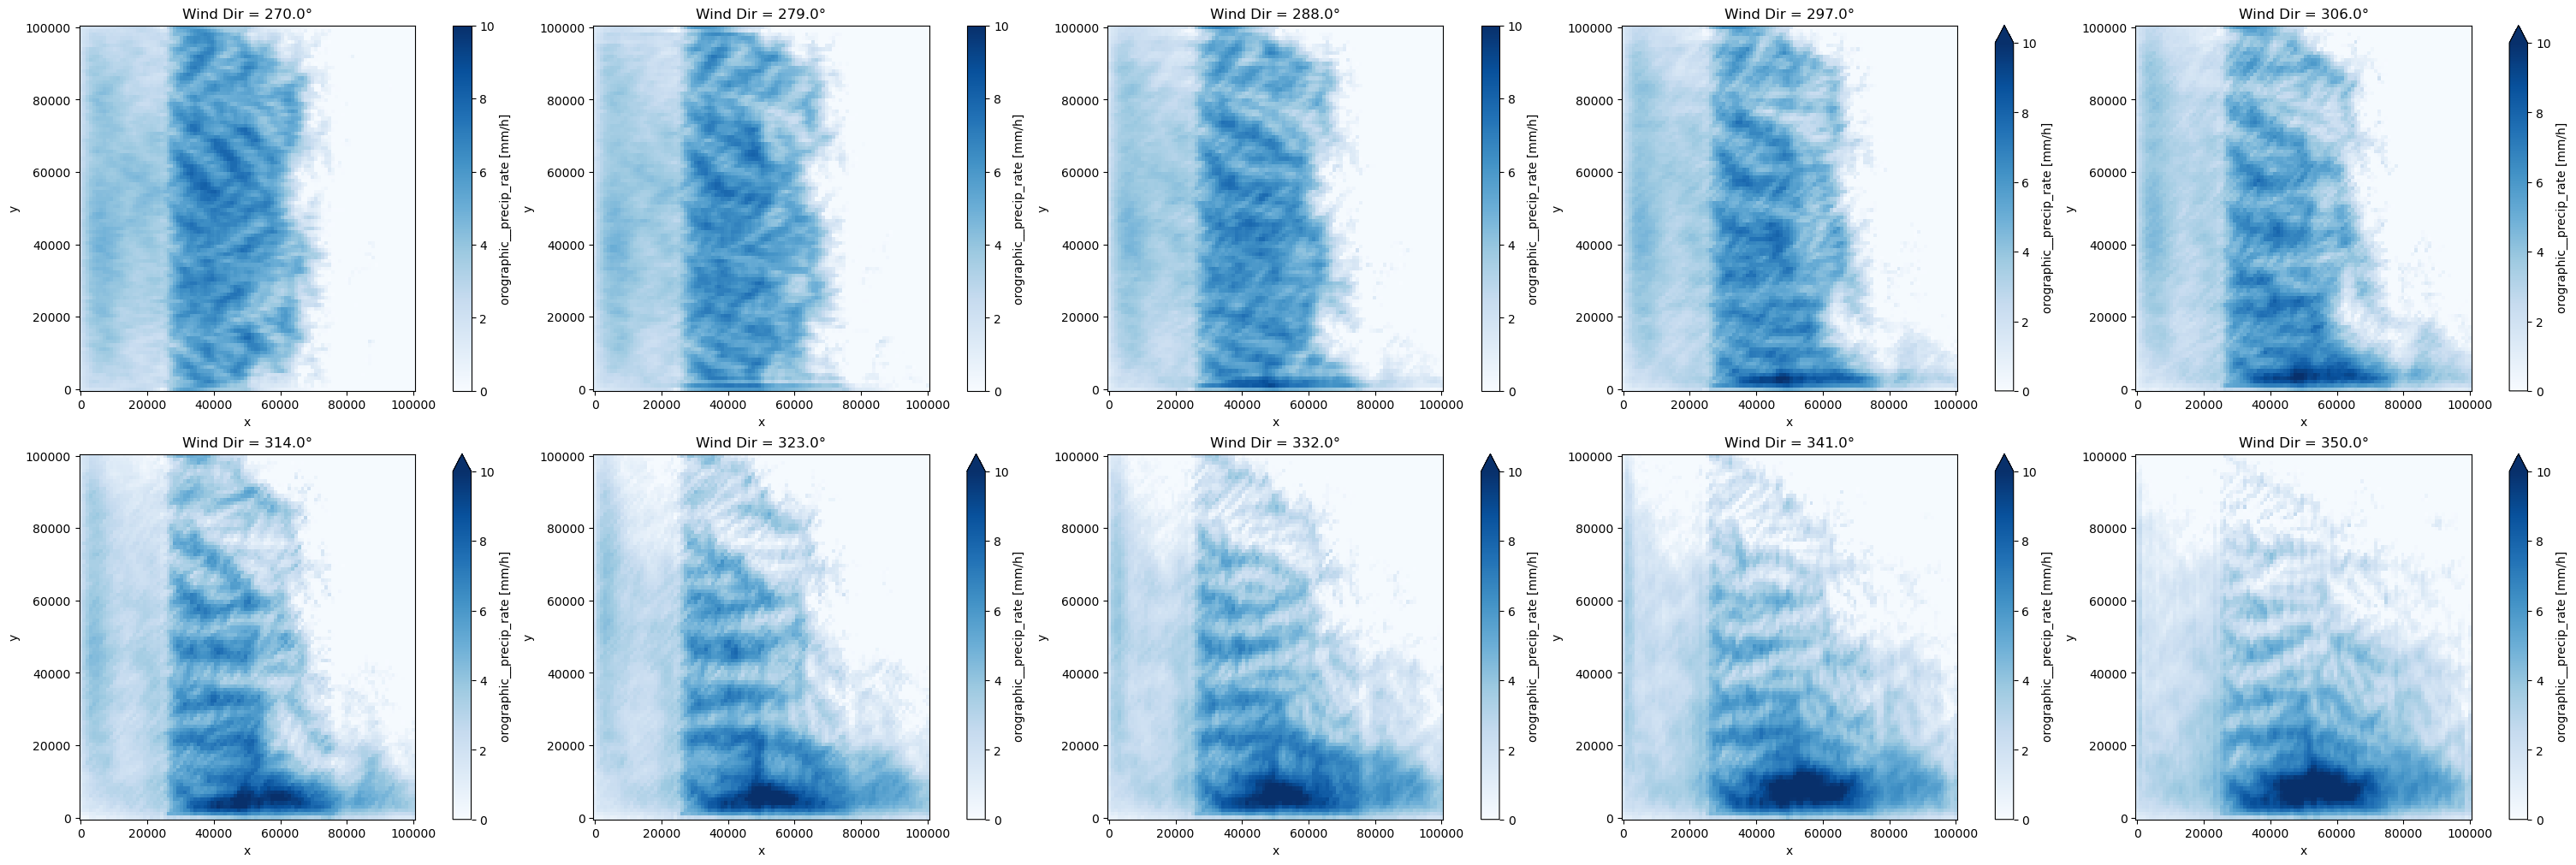

In [19]:
import os
import matplotlib.pyplot as plt
import xarray as xr

# Directory containing Zarr files
output_dir = "simulation_outputs"

# List all Zarr files and sort by wind direction
zarr_files = [f for f in os.listdir(output_dir) if f.endswith(".zarr")]
zarr_files.sort(key=lambda f: float(f.split("_")[-1][:-5]))

# Load datasets and attach wind_direction as a coordinate
datasets = []
wind_directions = []
for zarr_file in zarr_files:
    wind_direction = float(zarr_file.split("_")[-1][:-5])  # Extract wind direction from filename
    if 270 <= wind_direction <= 350:  # Filter wind directions between 270 and 350
        ds = xr.open_zarr(os.path.join(output_dir, zarr_file), chunks={})
        
        # Add wind_direction as a coordinate
        ds = ds.assign_coords(wind_direction=wind_direction)
        
        datasets.append(ds)
        wind_directions.append(wind_direction)

# Concatenate datasets along the new wind_direction dimension
combined_ds = xr.concat(datasets, dim="wind_direction")

# Ensure wind_direction is a dimension and coordinate
combined_ds = combined_ds.sortby("wind_direction")

### 📌 Plot: Orographic Precipitation Maps for Different Wind Directions at Final Time Step
fig, axes = plt.subplots(nrows=2, ncols=(len(wind_directions) + 1) // 2, figsize=(30, 10), constrained_layout=True)  # Increased width
axes = axes.flatten()

# Plot orographic precipitation for different wind directions
for ax, ds, wind_direction in zip(axes, datasets, wind_directions):
    precip_data = ds.orographic__precip_rate.isel(time=-1)  # Get precipitation data at the final time step
    precip_data.plot(ax=ax, vmin=0, vmax=10, cmap='Blues')  # Adjust color map and limits as needed
    ax.set_title(f"Wind Dir = {wind_direction:.1f}°", fontsize=12)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

# Hide any unused subplots
for i in range(len(wind_directions), len(axes)):
    fig.delaxes(axes[i])

# Save and show the plot
plt.savefig("Orographic_Precipitation_WindDirections_Filtered.png")
plt.show()

# Close all datasets
for ds in datasets:
    ds.close()


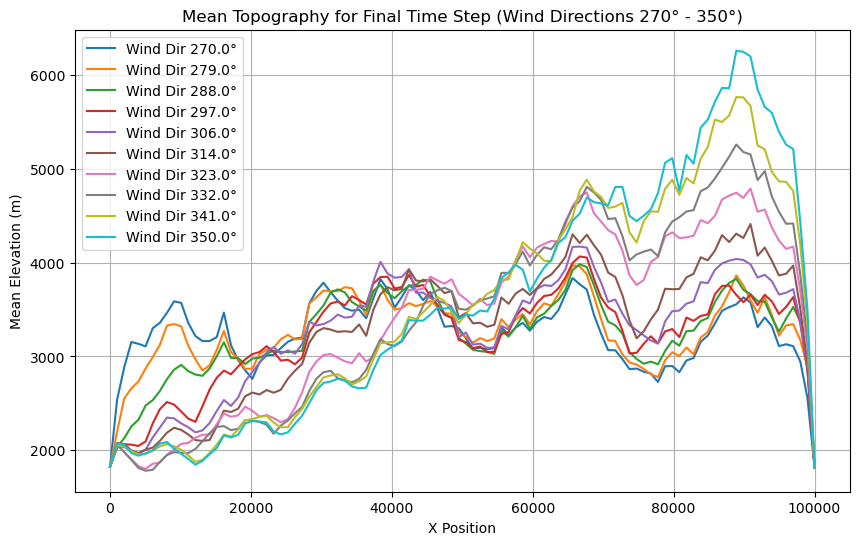

In [21]:
import os
import numpy as np
import xarray as xr
import hvplot.xarray  # For interactive plotting
import matplotlib.pyplot as plt
import dask

# Directory containing Zarr files
output_dir = "simulation_outputs"

# List all Zarr files and sort by wind direction
zarr_files = [f for f in os.listdir(output_dir) if f.endswith(".zarr")]
zarr_files.sort(key=lambda f: float(f.split("_")[-1][:-5]))

# Load datasets and attach wind_direction as a coordinate
datasets = []
wind_directions = []
for zarr_file in zarr_files:
    wind_direction = float(zarr_file.split("_")[-1][:-5])  # Extract wind direction from filename
    ds = xr.open_zarr(os.path.join(output_dir, zarr_file), chunks={})
    
    # Add wind_direction as a coordinate
    ds = ds.assign_coords(wind_direction=wind_direction)
    
    datasets.append(ds)
    wind_directions.append(wind_direction)

# Concatenate datasets along the new wind_direction dimension
combined_ds = xr.concat(datasets, dim="wind_direction")

# Ensure wind_direction is a dimension and coordinate
combined_ds = combined_ds.sortby("wind_direction")

# Filter datasets for wind directions between 270 and 350 degrees
filtered_ds = combined_ds.sel(wind_direction=slice(270, 350))

### 📌 Plot 1: Mean Topography for Final Time Step Across Simulations (Filtered Wind Directions)
plt.figure(figsize=(10, 6))

# Plot for each wind direction in the filtered range
for wind_direction in filtered_ds.wind_direction.values:
    mean_topography = filtered_ds.topography__elevation.sel(wind_direction=wind_direction).isel(time=-1).mean(dim='x')
    plt.plot(filtered_ds.x, mean_topography, label=f"Wind Dir {wind_direction:.1f}°")

plt.xlabel("X Position")
plt.ylabel("Mean Elevation (m)")
plt.title("Mean Topography for Final Time Step (Wind Directions 270° - 350°)")
plt.legend()
plt.grid()
plt.show()

# Close all datasets
for ds in datasets:
    ds.close()


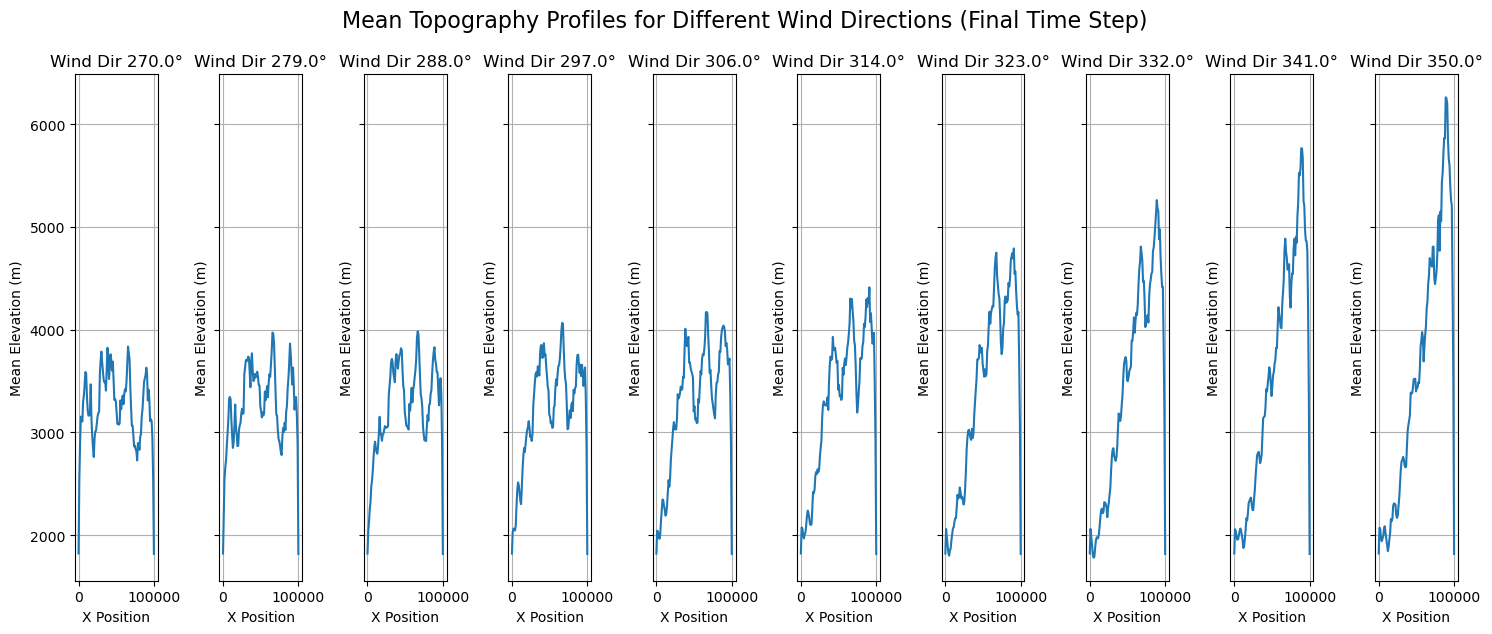

In [22]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import dask

# Directory containing Zarr files
output_dir = "simulation_outputs"

# List all Zarr files and sort by wind direction
zarr_files = [f for f in os.listdir(output_dir) if f.endswith(".zarr")]
zarr_files.sort(key=lambda f: float(f.split("_")[-1][:-5]))

# Load datasets and attach wind_direction as a coordinate
datasets = []
wind_directions = []
for zarr_file in zarr_files:
    wind_direction = float(zarr_file.split("_")[-1][:-5])  # Extract wind direction from filename
    ds = xr.open_zarr(os.path.join(output_dir, zarr_file), chunks={})
    
    # Add wind_direction as a coordinate
    ds = ds.assign_coords(wind_direction=wind_direction)
    
    datasets.append(ds)
    wind_directions.append(wind_direction)

# Concatenate datasets along the new wind_direction dimension
combined_ds = xr.concat(datasets, dim="wind_direction")

# Ensure wind_direction is a dimension and coordinate
combined_ds = combined_ds.sortby("wind_direction")

# Filter datasets for wind directions between 270 and 350 degrees
filtered_ds = combined_ds.sel(wind_direction=slice(270, 350))

# Create side-by-side subplots for each wind direction in the filtered range
num_plots = len(filtered_ds.wind_direction)
fig, axes = plt.subplots(1, num_plots, figsize=(15, 6), sharey=True)

# Plot for each wind direction in the filtered range
for i, wind_direction in enumerate(filtered_ds.wind_direction.values):
    mean_topography = filtered_ds.topography__elevation.sel(wind_direction=wind_direction).isel(time=-1).mean(dim='x')
    ax = axes[i]  # Select the subplot axis for this wind direction
    ax.plot(filtered_ds.x, mean_topography)
    ax.set_title(f"Wind Dir {wind_direction:.1f}°")
    ax.set_xlabel("X Position")
    ax.set_ylabel("Mean Elevation (m)")
    ax.grid()

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Mean Topography Profiles for Different Wind Directions (Final Time Step)", fontsize=16, y=1.05)
plt.show()

# Close all datasets
for ds in datasets:
    ds.close()


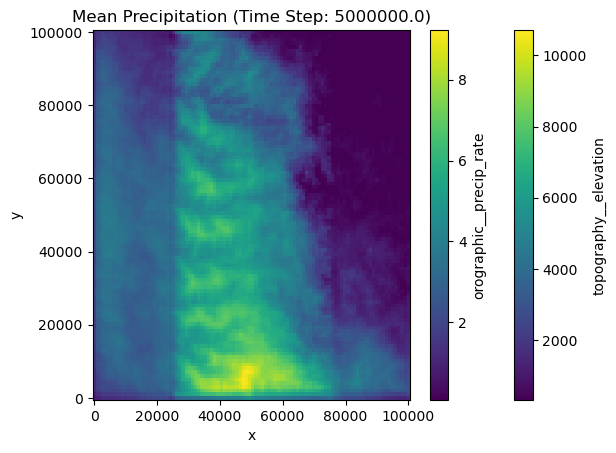

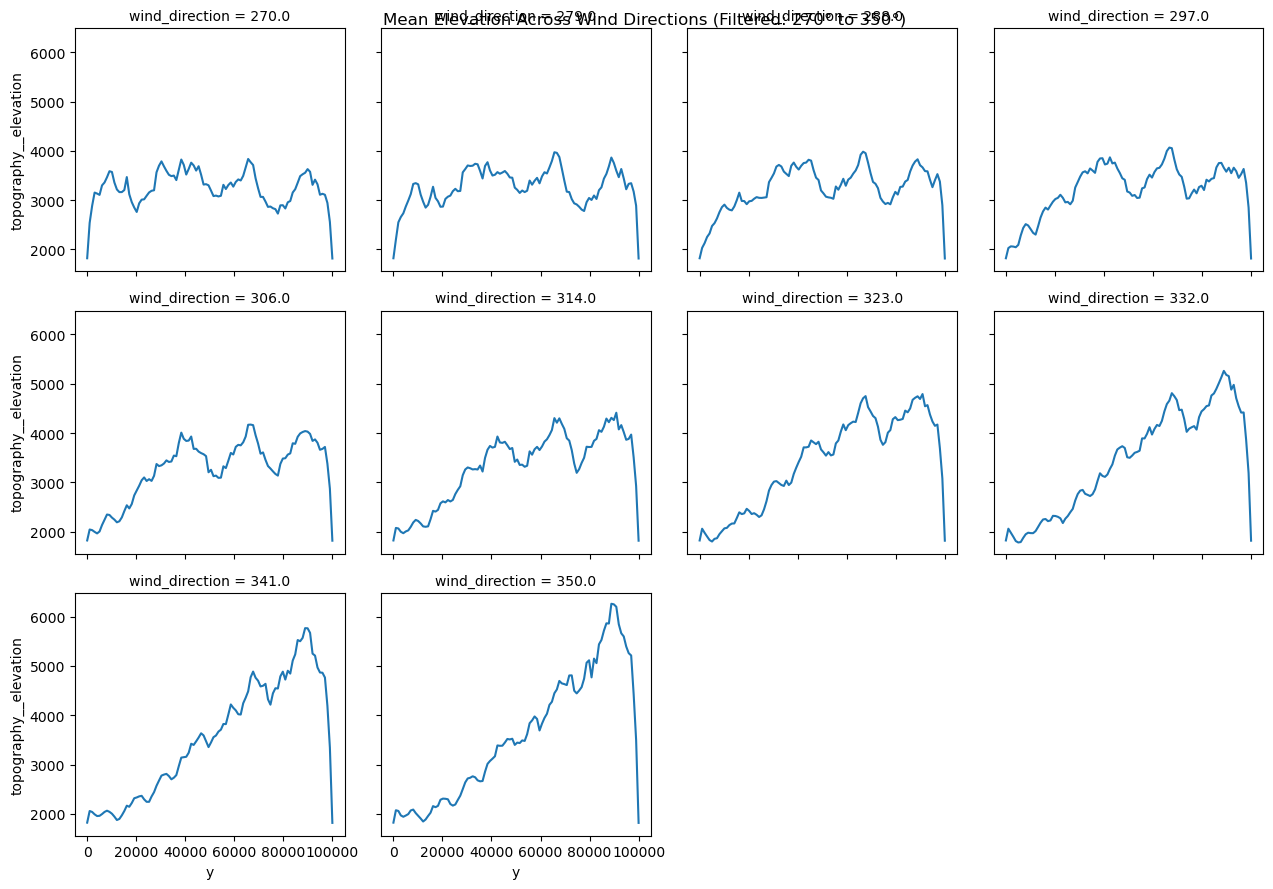

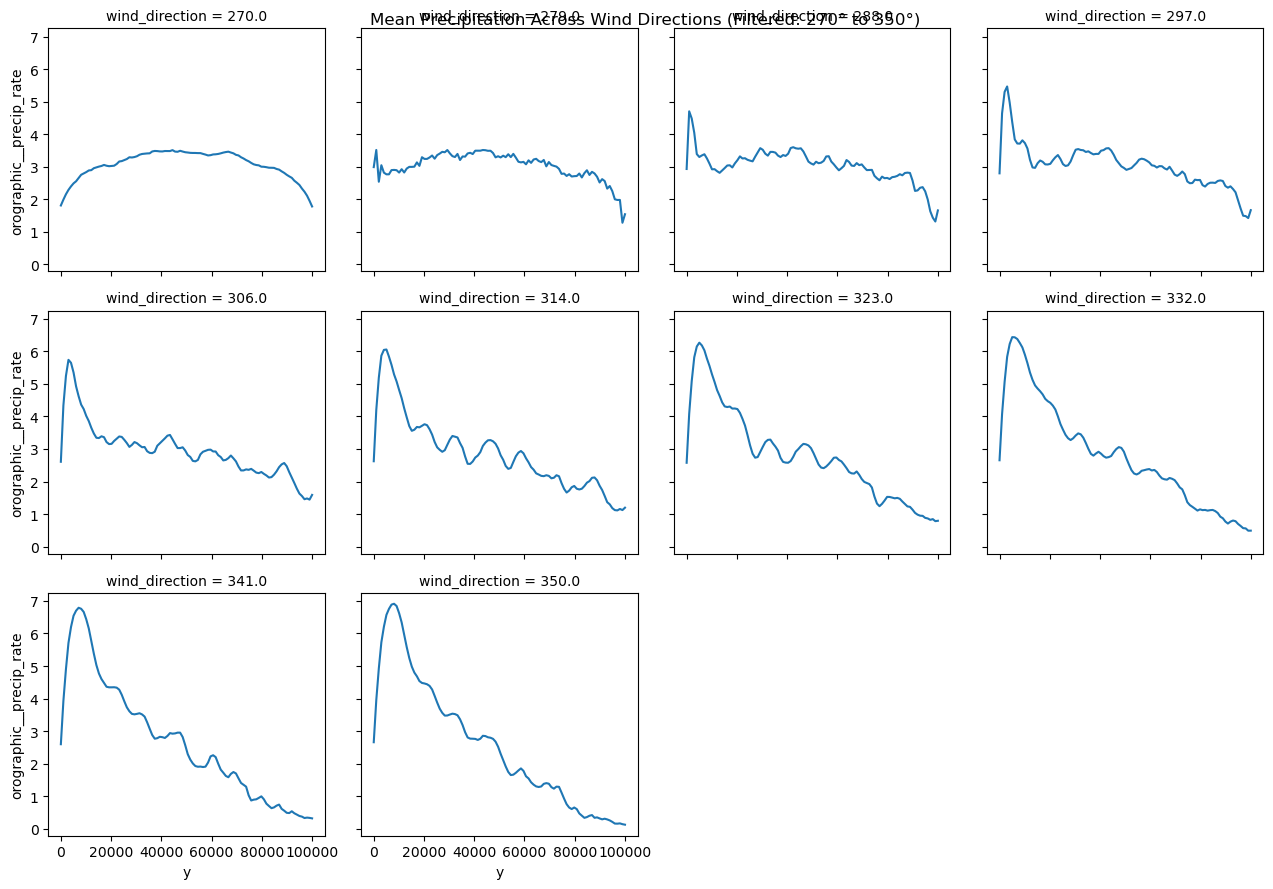

In [23]:
import os
import numpy as np
import xarray as xr
import hvplot.xarray  # For interactive plotting
import matplotlib.pyplot as plt
import dask

# Directory containing Zarr files
output_dir = "simulation_outputs"

# List all Zarr files and sort by wind direction
zarr_files = [f for f in os.listdir(output_dir) if f.endswith(".zarr")]
zarr_files.sort(key=lambda f: float(f.split("_")[-1][:-5]))

# Load datasets and attach wind_direction as a coordinate
datasets = []
wind_directions = []
for zarr_file in zarr_files:
    wind_direction = float(zarr_file.split("_")[-1][:-5])  # Extract wind direction from filename
    ds = xr.open_zarr(os.path.join(output_dir, zarr_file), chunks={})
    
    # Add wind_direction as a coordinate
    ds = ds.assign_coords(wind_direction=wind_direction)
    
    datasets.append(ds)
    wind_directions.append(wind_direction)

# Concatenate datasets along the new wind_direction dimension
combined_ds = xr.concat(datasets, dim="wind_direction")

# Ensure wind_direction is a dimension and coordinate
combined_ds = combined_ds.sortby("wind_direction")

# Filter wind directions between 270 and 350
filtered_ds = combined_ds.sel(wind_direction=slice(270, 350))

# Compute and plot mean elevation over wind direction (filtered)
avg_elevation = filtered_ds.topography__elevation.mean(dim='wind_direction')

# Plot mean elevation at the final time step
avg_elevation.isel(time=-1).plot()
plt.title("Mean Elevation (Time Step: {})".format(filtered_ds.time[-1].values))

# Compute and plot mean precipitation over wind direction (filtered)
avg_precip = filtered_ds.orographic__precip_rate.mean(dim='wind_direction')

# Plot mean precipitation at the final time step
avg_precip.isel(time=-1).plot()
plt.title("Mean Precipitation (Time Step: {})".format(filtered_ds.time[-1].values))

### 📌 Plot 3: Mean Elevation Across Wind Directions at Final Time Step (Filtered)
(filtered_ds
 .topography__elevation.isel(time=-1)  # Select last time step
 .mean(dim='x')  # Average over 'x' axis
 .plot(col='wind_direction', col_wrap=4)  # Plot for each wind direction
)
plt.suptitle("Mean Elevation Across Wind Directions (Filtered: 270° to 350°)")

### 📌 Plot 4: Mean Precipitation Across Wind Directions at Final Time Step (Filtered)
(filtered_ds
 .orographic__precip_rate.isel(time=-1)  # Select last time step
 .mean(dim='x')  # Average over 'x' axis
 .plot(col='wind_direction', col_wrap=4)  # Plot for each wind direction
)
plt.suptitle("Mean Precipitation Across Wind Directions (Filtered: 270° to 350°)")

# Ensure the plots are displayed
plt.show()

# Close all datasets
for ds in datasets:
    ds.close()


/var/folders/ws/0hr6lrzs09dcnvnzt4md1v900000gn/T/ipykernel_20789/1730634935.py:54: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax, wind_dir in zip(elev_plot.axes.flat, filtered_ds.wind_direction.values):
/var/folders/ws/0hr6lrzs09dcnvnzt4md1v900000gn/T/ipykernel_20789/1730634935.py:67: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax, wind_dir in zip(precip_plot.axes.flat, filtered_ds.wind_direction.values):


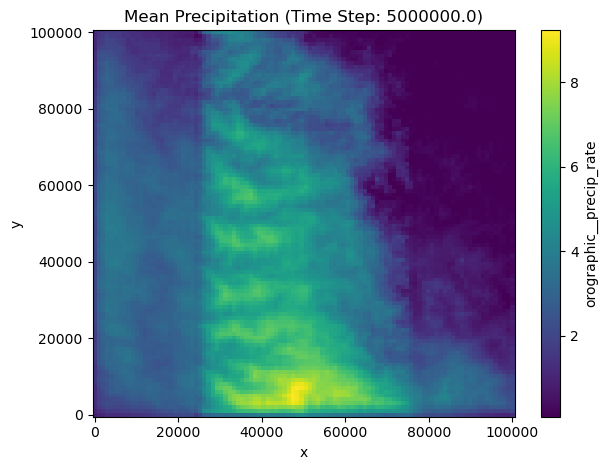

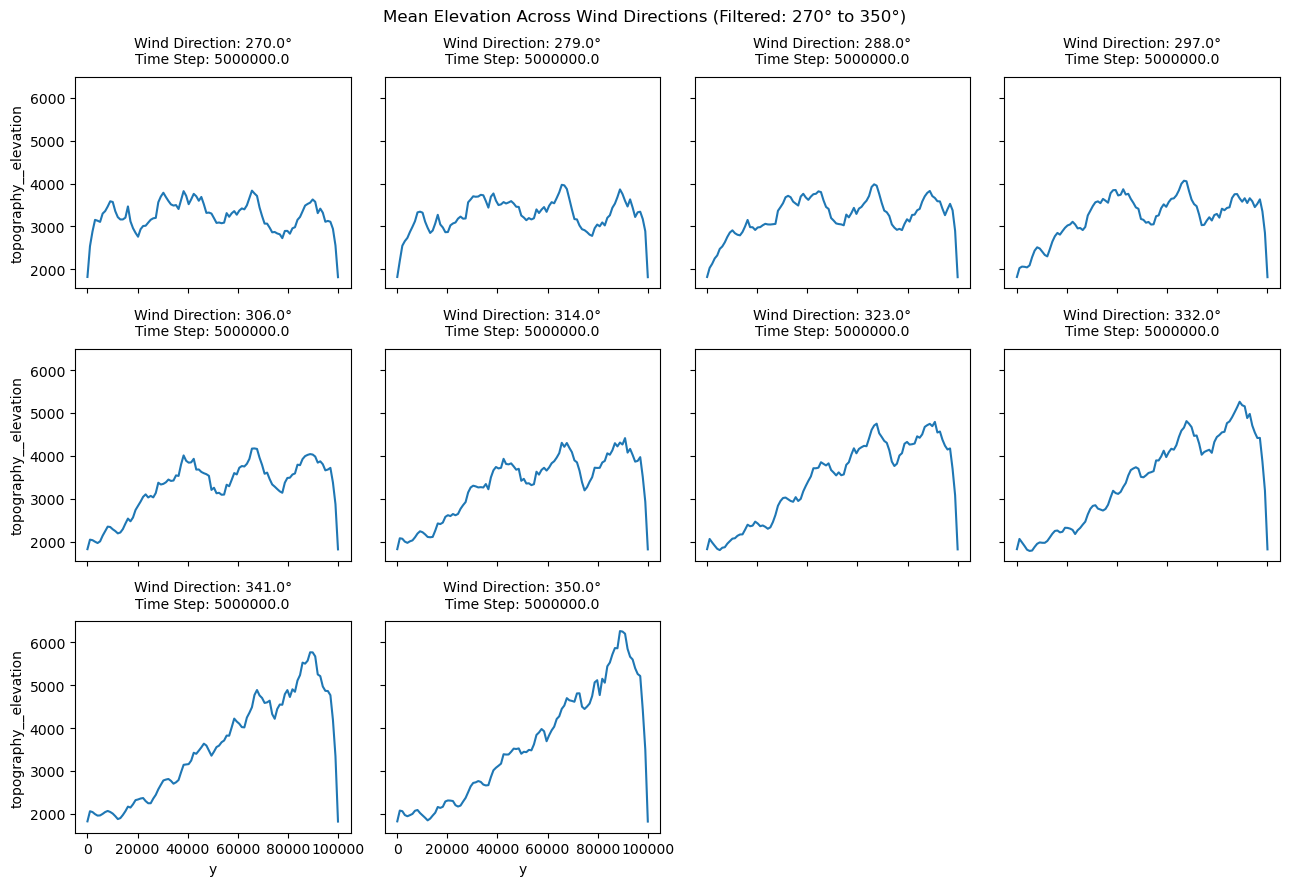

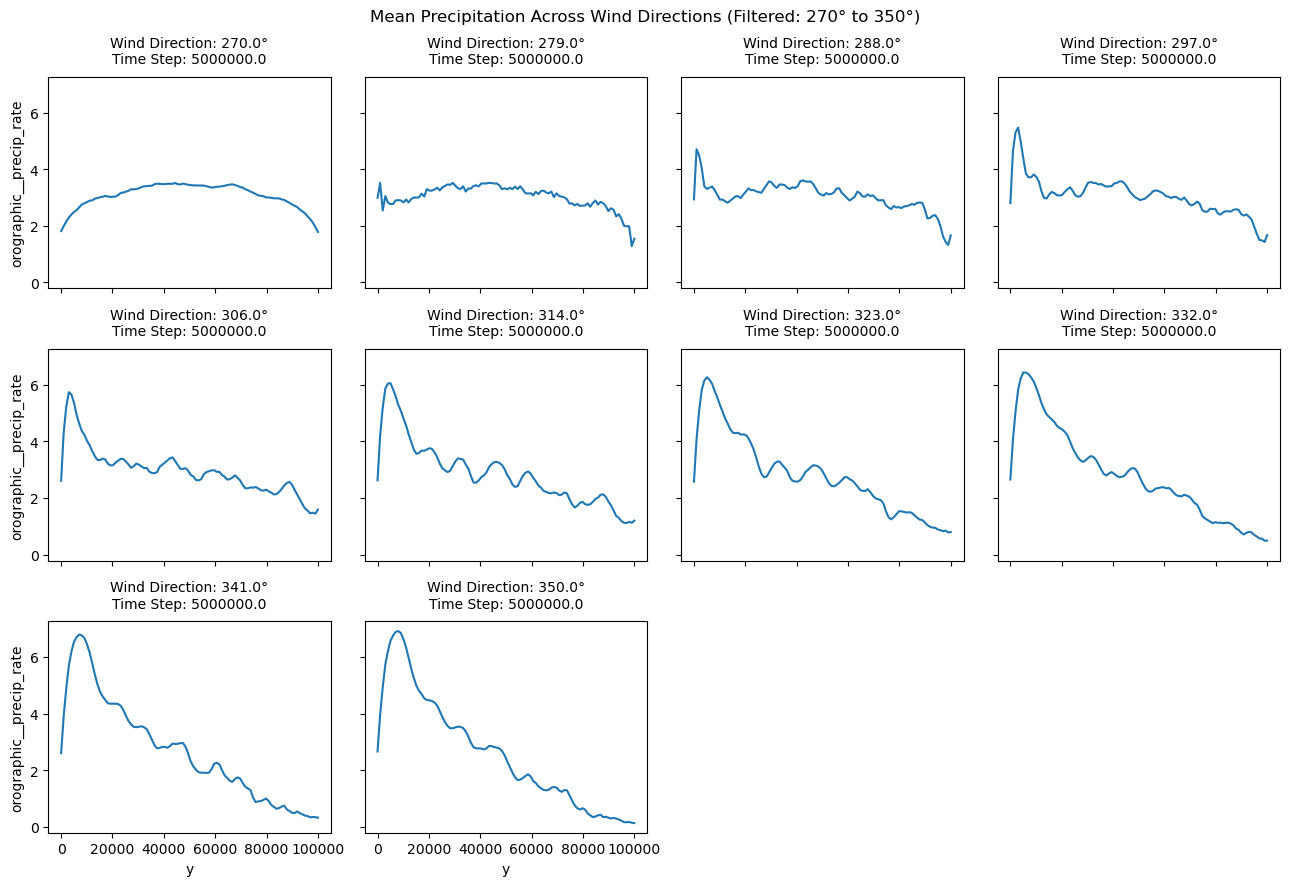

In [24]:
import os
import numpy as np
import xarray as xr
import hvplot.xarray  # For interactive plotting
import matplotlib.pyplot as plt
import dask

# Directory containing Zarr files
output_dir = "simulation_outputs"

# List all Zarr files and sort by wind direction
zarr_files = [f for f in os.listdir(output_dir) if f.endswith(".zarr")]
zarr_files.sort(key=lambda f: float(f.split("_")[-1][:-5]))

# Load datasets and attach wind_direction as a coordinate
datasets = []
wind_directions = []
for zarr_file in zarr_files:
    wind_direction = float(zarr_file.split("_")[-1][:-5])  # Extract wind direction from filename
    ds = xr.open_zarr(os.path.join(output_dir, zarr_file), chunks={})
    
    # Add wind_direction as a coordinate
    ds = ds.assign_coords(wind_direction=wind_direction)
    
    datasets.append(ds)
    wind_directions.append(wind_direction)

# Concatenate datasets along the new wind_direction dimension
combined_ds = xr.concat(datasets, dim="wind_direction")

# Ensure wind_direction is a dimension and coordinate
combined_ds = combined_ds.sortby("wind_direction")

# Filter wind directions between 270 and 350
filtered_ds = combined_ds.sel(wind_direction=slice(270, 350))

# Compute mean elevation over wind direction (filtered)
avg_elevation = filtered_ds.topography__elevation.mean(dim='wind_direction')

# Compute mean precipitation over wind direction (filtered)
avg_precip = filtered_ds.orographic__precip_rate.mean(dim='wind_direction')

# Plot mean precipitation at the final time step
avg_precip.isel(time=-1).plot()
plt.title("Mean Precipitation (Time Step: {})".format(filtered_ds.time[-1].values))
plt.tight_layout()

###  Plot 1: Mean Elevation Across Wind Directions at Final Time Step (Filtered)
(elev_plot := filtered_ds
 .topography__elevation.isel(time=-1)  # Select last time step
 .mean(dim='x')  # Average over 'x' axis
 .plot(col='wind_direction', col_wrap=4)  # Plot for each wind direction
)
for ax, wind_dir in zip(elev_plot.axes.flat, filtered_ds.wind_direction.values):
    time_step = filtered_ds.time[-1].values
    ax.set_title(f"Wind Direction: {wind_dir}°\nTime Step: {time_step}", fontsize=10, pad=10)
    ax.label_outer()  # Hide axis labels for subplots for clarity
plt.suptitle("Mean Elevation Across Wind Directions (Filtered: 270° to 350°)", fontsize=12)
plt.tight_layout()

###  Plot 2: Mean Precipitation Across Wind Directions at Final Time Step (Filtered)
(precip_plot := filtered_ds
 .orographic__precip_rate.isel(time=-1)  # Select last time step
 .mean(dim='x')  # Average over 'x' axis
 .plot(col='wind_direction', col_wrap=4)  # Plot for each wind direction
)
for ax, wind_dir in zip(precip_plot.axes.flat, filtered_ds.wind_direction.values):
    time_step = filtered_ds.time[-1].values
    ax.set_title(f"Wind Direction: {wind_dir}°\nTime Step: {time_step}", fontsize=10, pad=10)
    ax.label_outer()  # Hide axis labels for subplots for clarity
plt.suptitle("Mean Precipitation Across Wind Directions (Filtered: 270° to 350°)", fontsize=12)
plt.tight_layout()

# Ensure the plots are displayed
plt.show()

# Close all datasets
for ds in datasets:
    ds.close()


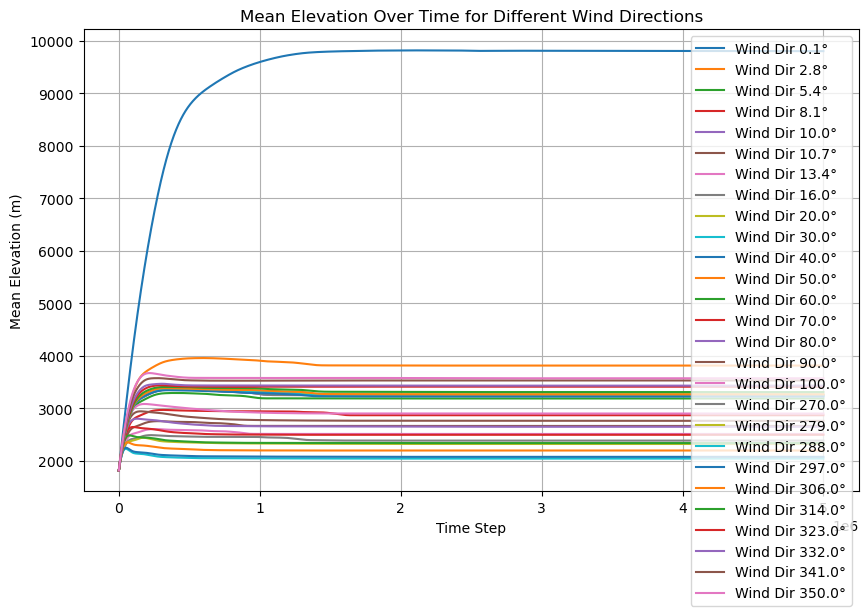

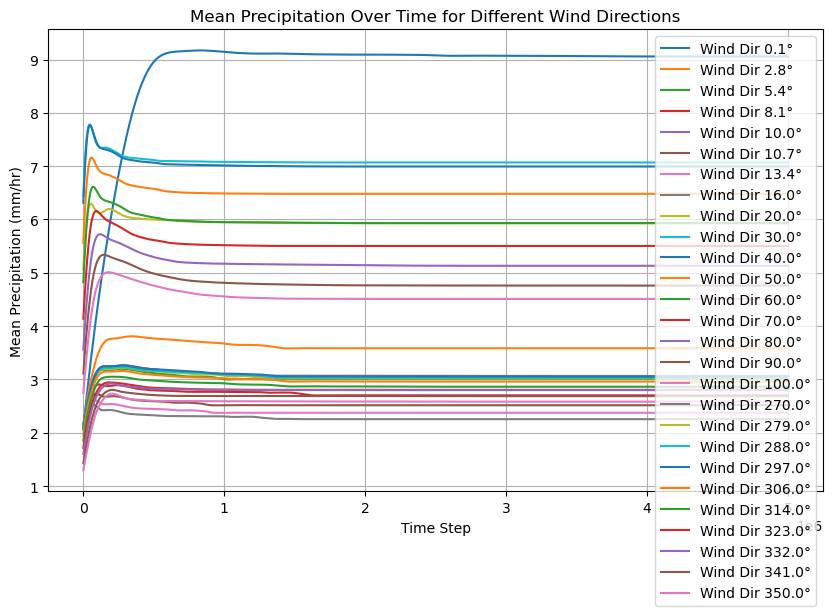

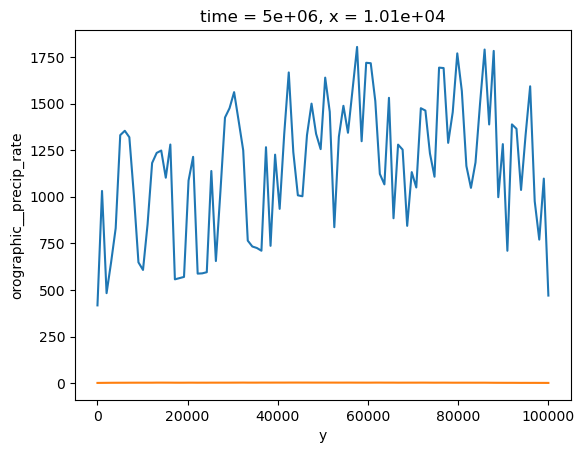

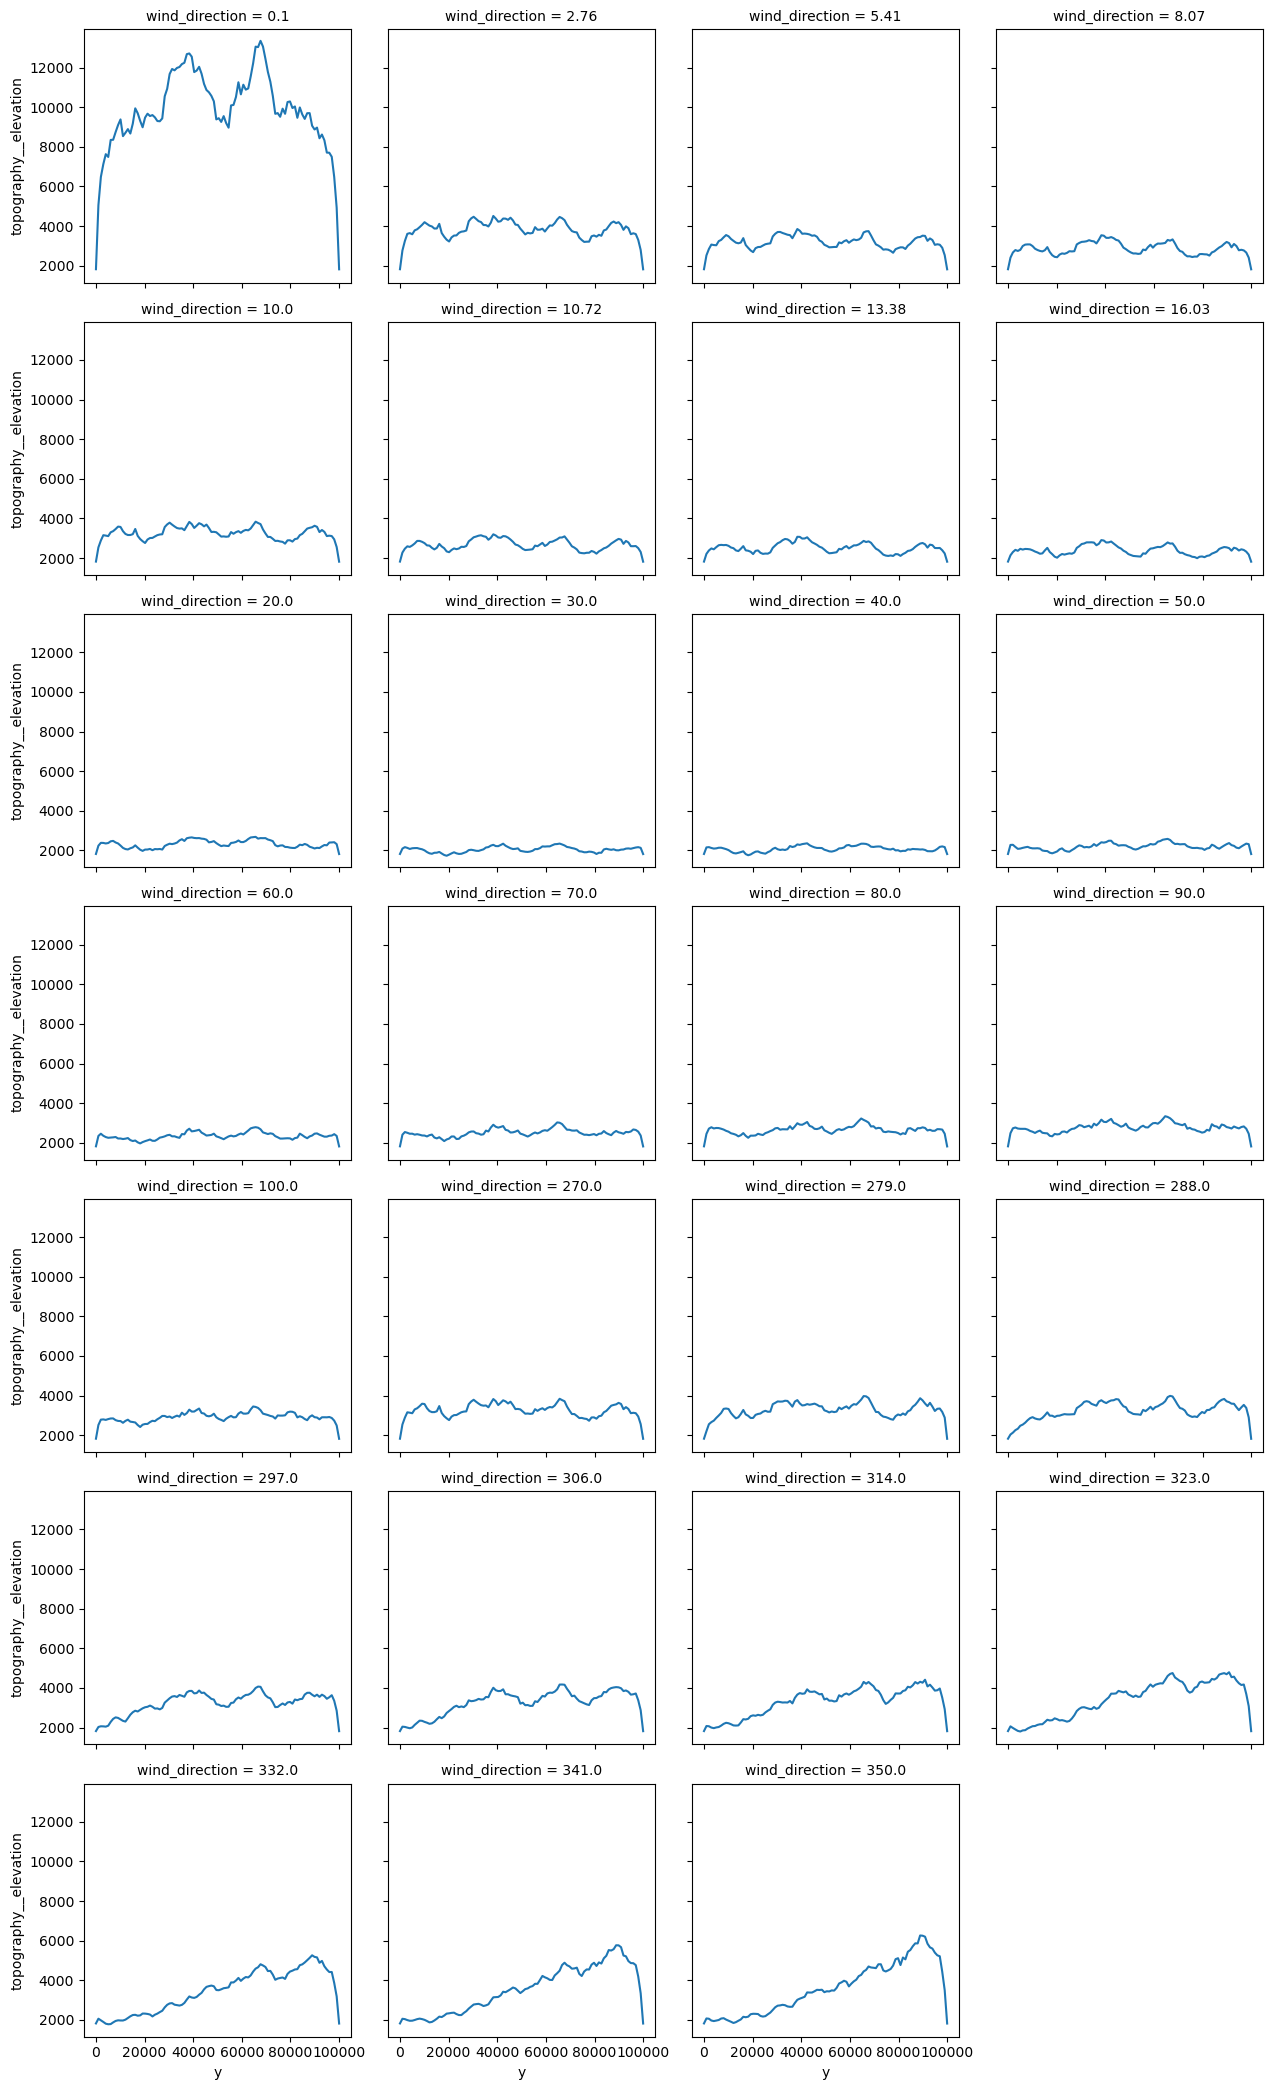

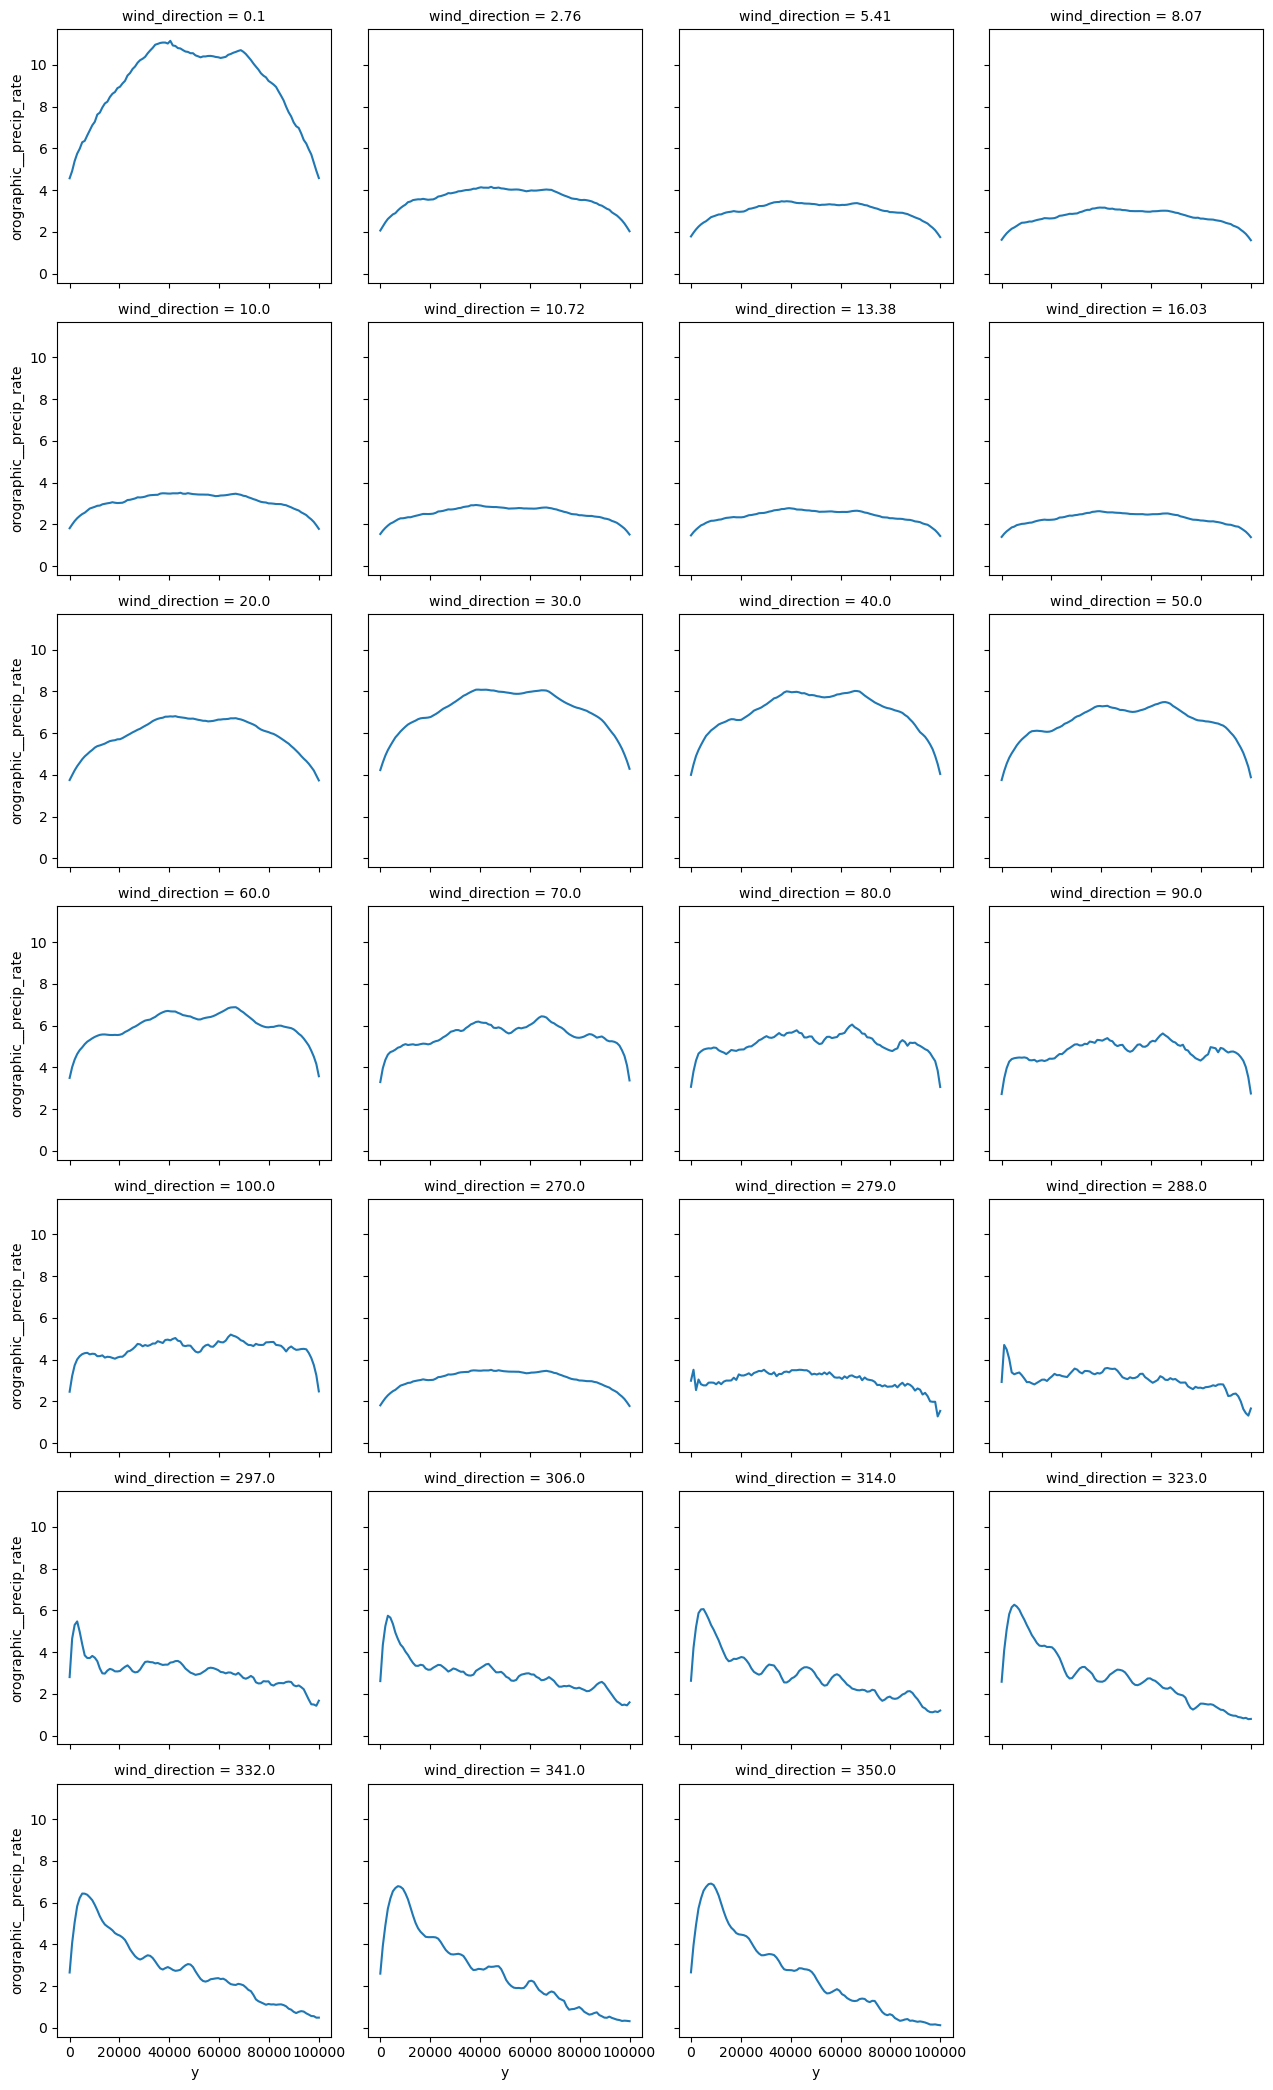

In [10]:
import os
import numpy as np
import xarray as xr
import hvplot.xarray  # For interactive plotting
import matplotlib.pyplot as plt
import dask

# Directory containing Zarr files
output_dir = "simulation_outputs"

# List all Zarr files and sort by wind direction
zarr_files = [f for f in os.listdir(output_dir) if f.endswith(".zarr")]
zarr_files.sort(key=lambda f: float(f.split("_")[-1][:-5]))

# Load datasets and attach wind_direction as a coordinate
datasets = []
wind_directions = []
for zarr_file in zarr_files:
    wind_direction = float(zarr_file.split("_")[-1][:-5])  # Extract wind direction from filename
    ds = xr.open_zarr(os.path.join(output_dir, zarr_file), chunks={})
    
    # Add wind_direction as a coordinate
    ds = ds.assign_coords(wind_direction=wind_direction)
    
    datasets.append(ds)
    wind_directions.append(wind_direction)

# Concatenate datasets along the new wind_direction dimension
combined_ds = xr.concat(datasets, dim="wind_direction")

# Ensure wind_direction is a dimension and coordinate
combined_ds = combined_ds.sortby("wind_direction")

### 📌 Plot 1: Mean Elevation Over Time for Different Wind Directions
plt.figure(figsize=(10, 6))
for ds, wind_direction in zip(datasets, wind_directions):
    mean_elevation = ds["topography__elevation"].mean(dim=("x", "y"))
    plt.plot(ds["time"], mean_elevation, label=f"Wind Dir {wind_direction:.1f}°")

plt.xlabel("Time Step")
plt.ylabel("Mean Elevation (m)")
plt.title("Mean Elevation Over Time for Different Wind Directions")
plt.legend()
plt.grid()
plt.show()

### 📌 Plot 2: Mean Precipitation Over Time for Different Wind Directions
plt.figure(figsize=(10, 6))
for ds, wind_direction in zip(datasets, wind_directions):
    mean_precip = ds["orographic__precip_rate"].mean(dim=("x", "y"))
    plt.plot(ds["time"], mean_precip, label=f"Wind Dir {wind_direction:.1f}°")

plt.xlabel("Time Step")
plt.ylabel("Mean Precipitation (mm/hr)")
plt.title("Mean Precipitation Over Time for Different Wind Directions")
plt.legend()
plt.grid()
plt.show()

# Compute and plot mean elevation over wind direction
avg_elevation = combined_ds.topography__elevation.mean(dim='wind_direction')

# Fix: Use method="nearest" to avoid KeyError
avg_elevation.isel(time=-1).sel(x=10000, method="nearest").plot()

# Compute and plot mean precipitation over wind direction
avg_precip = combined_ds.orographic__precip_rate.mean(dim='wind_direction')

# Fix: Use method="nearest" to avoid KeyError
avg_precip.isel(time=-1).sel(x=10000, method="nearest").plot()

### 📌 Plot 3: Mean Elevation Across Wind Directions at Final Time Step
(combined_ds
 .topography__elevation.isel(time=-1)  # Select last time step
 .mean(dim='x')  # Average over 'x' axis
 .plot(col='wind_direction', col_wrap=4)  # Plot for each wind direction
)

### 📌 Plot 4: Mean Precipitation Across Wind Directions at Final Time Step
(combined_ds
 .orographic__precip_rate.isel(time=-1)  # Select last time step
 .mean(dim='x')  # Average over 'x' axis
 .plot(col='wind_direction', col_wrap=4)  # Plot for each wind direction
)

# Ensure the plots are displayed
plt.show()

# Close all datasets
for ds in datasets:
    ds.close()